<img src="header.png" style="border-radius: 50%; display: block; margin: 0 auto; width: 200px; height: 200px;">
<h1>Hull Tactical - Market Prediction</h1>
<p>Can you predict market predictability?</p>
<h2>Overview</h2>
<p>Your task is to predict the stock market returns as represented by the excess returns of the S&P 500 while also managing volatility constraints. Your work will test the Efficient Market Hypothesis and challenge common tenets of personal finance.</p>
<h3>Source</h3>
<a href="https://www.kaggle.com/competitions/hull-tactical-market-prediction/overview" class="source-link">Source Link</a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('datasets/train.csv')
df

date_id  D1  D2  D3  D4  D5  D6  D7  D8  D9  ...        V3        V4  \
0           0   0   0   0   1   1   0   0   0   1  ...       NaN       NaN   
1           1   0   0   0   1   1   0   0   0   1  ...       NaN       NaN   
2           2   0   0   0   1   0   0   0   0   1  ...       NaN       NaN   
3           3   0   0   0   1   0   0   0   0   0  ...       NaN       NaN   
4           4   0   0   0   1   0   0   0   0   0  ...       NaN       NaN   
...       ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...       ...       ...   
8985     8985   0   0   0   0   0   0   0   0   0  ...  0.469577  0.837963   
8986     8986   0   0   0   0   0   0   0   0   0  ...  0.671958  0.837963   
8987     8987   0   0   1   0   0   0   0   0   0  ...  0.481481  0.787698   
8988     8988   0   0   0   0   0   0   0   0   0  ...  0.655423  0.783730   
8989     8989   0   0   0   0   0   0   0   0   0  ...  0.066799  0.783730   

            V5        V6        V7        V8        V9  forward_returns  \
0          NaN       NaN       NaN       NaN       NaN        -0.002421   
1          NaN       NaN       NaN       NaN       NaN        -0.008495   
2          NaN       NaN       NaN       NaN       NaN        -0.009624   
3          NaN       NaN       NaN       NaN       NaN         0.004662   
4          NaN       NaN       NaN       NaN       NaN        -0.011686   
...        ...       ...       ...       ...       ...              ...   
8985  1.226772  0.822751 -0.707361  0.142857 -0.649616         0.002457   
8986  0.785877  0.805556 -0.715692  0.196098 -0.668289         0.002312   
8987  0.834898  0.823413 -0.723949  0.133929 -0.670946         0.002891   
8988  0.994026  0.851852 -0.684937  0.101852 -0.646265         0.008310   
8989  1.068037  0.879630 -0.764806  0.079034 -0.705662         0.000099   

      risk_free_rate  market_forward_excess_returns  
0           0.000301                      -0.003038  
1           0.000303                      -0.009114  
2           0.000301                      -0.010243  
3           0.000299                       0.004046  
4           0.000299                      -0.012301  
...              ...                            ...  
8985        0.000155                       0.001990  
8986        0.000156                       0.001845  
8987        0.000156                       0.002424  
8988        0.000156                       0.007843  
8989        0.000156                      -0.000368  

[8990 rows x 98 columns]

# 1. Data Cleaning

In [3]:
df.shape

(8990, 98)

In [4]:
df.columns

Index(['date_id', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'E1',
       'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19',
       'E2', 'E20', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'I1', 'I2', 'I3',
       'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'M1', 'M10', 'M11', 'M12', 'M13',
       'M14', 'M15', 'M16', 'M17', 'M18', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7',
       'M8', 'M9', 'P1', 'P10', 'P11', 'P12', 'P13', 'P2', 'P3', 'P4', 'P5',
       'P6', 'P7', 'P8', 'P9', 'S1', 'S10', 'S11', 'S12', 'S2', 'S3', 'S4',
       'S5', 'S6', 'S7', 'S8', 'S9', 'V1', 'V10', 'V11', 'V12', 'V13', 'V2',
       'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'forward_returns',
       'risk_free_rate', 'market_forward_excess_returns'],
      dtype='object')

## 1. Missing Data

In [5]:
df.isna().sum()[df.isna().sum() > 0]


E1     1784
E10    1006
E11    1006
E12    1006
E13    1006
       ... 
V5     1512
V6     1006
V7     1511
V8     1006
V9     4539
Length: 85, dtype: int64

In [ ]:
df.set_index('date_id', inplace=True)
missing_pct = df.isnull().sum() / len(df) * 100
print(missing_pct.sort_values(ascending=False))  # See the worst feature

E7                               77.519466
V10                              67.285873
S3                               63.770857
M1                               61.701891
M14                              61.624027
                                   ...    
D6                                0.000000
D5                                0.000000
D4                                0.000000
D3                                0.000000
market_forward_excess_returns     0.000000
Length: 97, dtype: float64


In [8]:
columns_with_nulls = (df.isnull().any(axis=0)).sum()
rows_with_nulls = (df.isnull().any(axis=1)).sum()
print(f"Columns with nulls: {columns_with_nulls}")
print(f"Rows with nulls: {rows_with_nulls}")

Columns with nulls: 85
Rows with nulls: 6969


In [7]:
count_above_60 = (missing_pct > 60).sum()
print(count_above_60)  # Count of columns with more than 60% missing values

6


In [31]:
# Pseudo-years
df = pd.read_csv('datasets/train.csv')
date_col = 'date_id'
days_per_year = 360
total_years = len(df) / days_per_year  # ~25
recent_start = int(15 * days_per_year)  # Drop first 15 years: start from index ~5400

In [32]:
# Filter recent 10 years
df_recent = df.iloc[recent_start:].copy()  # ~10 years, ~3600 rows
print(f"Recent subset shape: {df_recent.shape}, years approx: {len(df_recent)/days_per_year}")

Recent subset shape: (3590, 98), years approx: 9.972222222222221


In [33]:
# Cek overall missing in recent
target_cols = ['forward_returns', 'risk_free_rate', 'market_forward_excess_returns']
feature_cols = [col for col in df_recent.columns if col not in target_cols + [date_col]]
missing_recent = df_recent[feature_cols].isnull().sum().sum() / (len(df_recent) * len(feature_cols)) * 100
print(f"Overall missing % in recent: {missing_recent:.1f}%")

Overall missing % in recent: 0.9%


In [34]:
# Identify complete-ish years in recent (e.g., <10% missing per year)
df_recent[date_col] = df_recent[date_col].astype(int)  # Ensure numeric
df_recent['pseudo_year'] = (df_recent[date_col] // days_per_year).astype(int)
yearly_missing = df_recent.groupby('pseudo_year')[feature_cols].apply(lambda x: x.isnull().mean().mean()).sort_values()
complete_years = yearly_missing[yearly_missing < 0.10].index.tolist()  # <10% missing
print(f"Complete-ish years in recent: {complete_years}, total rows: {len(df_recent[df_recent['pseudo_year'].isin(complete_years)])}")

Complete-ish years in recent: [20, 21, 22, 23, 24, 19, 17, 18, 16, 15], total rows: 3590


In [35]:
#Compare with full complete (6 years global)
full_missing_per_row = df[feature_cols].isnull().mean(axis=1)
clean_rows_global = df[full_missing_per_row < 0.01]  # <1% missing per row
print(f"Global clean rows (6 years equiv): {len(clean_rows_global)}")

Global clean rows (6 years equiv): 2021


In [36]:
# Impute minimal in recent
df_recent.set_index(date_col, inplace=True)
gap_cols = [col for col in feature_cols if df_recent[col].isnull().sum() > 0]
print(f"Columns with missing in recent: {gap_cols} (total: {len(gap_cols)})")

for col in gap_cols:
    null_mask = df_recent[col].isnull()
    if not null_mask.any():
        continue  # Skip jika no missing (safety)
    
    # Fixed rumus max_gap: Standard Pandas untuk max consecutive NaNs
    if len(null_mask) > 0:
        groups = (null_mask != null_mask.shift(1)).cumsum()
        max_gap = null_mask.groupby(groups).sum().max()
    else:
        max_gap = 0
    
    if max_gap <= 180:  # <6 months, impute
        df_recent[col] = df_recent[col].interpolate(method='linear', limit_direction='both')
        # Fallback untuk edge cases (awal/akhir index)
        df_recent[col] = df_recent[col].fillna(method='ffill').fillna(method='bfill')
        print(f"Imputed {col} (max consecutive gap: {int(max_gap) if pd.notna(max_gap) else 0} rows)")
    else:
        print(f"Skip impute {col}: Gap too large ({int(max_gap) if pd.notna(max_gap) else 0} rows), consider drop col")

Columns with missing in recent: ['E7', 'M1', 'M13', 'M14', 'S3', 'V10'] (total: 6)
Skip impute E7: Gap too large (1569 rows), consider drop col
Imputed M1 (max consecutive gap: 147 rows)
Imputed M13 (max consecutive gap: 140 rows)
Imputed M14 (max consecutive gap: 140 rows)
Skip impute S3: Gap too large (333 rows), consider drop col
Skip impute V10: Gap too large (649 rows), consider drop col


In [38]:
# Drop Col
df_recent = df_recent.drop(['E7', 'S3', 'V10'], axis=1)

In [39]:
# Final check: Overall missing after imputation
feature_cols = [col for col in df_recent.columns if col not in target_cols + [date_col]]
final_missing = df_recent[feature_cols].isnull().sum().sum()
print(f"Remaining missing values in features: {final_missing}")

Remaining missing values in features: 0


In [40]:
# Save the Data
df_recent.reset_index(inplace=True)
df_recent.to_csv('datasets/train_recent_10y.csv', index=False)
print("Saved recent processed data.")

Saved recent processed data.


## 2. Data Type

In [24]:
df.dtypes

date_id                            int64
D1                                 int64
D2                                 int64
D3                                 int64
D4                                 int64
                                  ...   
V8                               float64
V9                               float64
forward_returns                  float64
risk_free_rate                   float64
market_forward_excess_returns    float64
Length: 98, dtype: object

In [25]:
(df.dtypes == 'object').any()

np.False_

In [27]:
df.to_pickle('datasets/train_cleaned.pkl')

# 2. Exploratory Data Analysis (EDA)

In [2]:
df = pd.read_pickle('datasets/train_cleaned.pkl')
df.head()

date_id  D1  D2  D3  D4  D5  D6  D7  D8  D9  ...   V3   V4   V5   V6   V7  \
0        0   0   0   0   1   1   0   0   0   1  ...  0.0  0.0  0.0  0.0  0.0   
1        1   0   0   0   1   1   0   0   0   1  ...  0.0  0.0  0.0  0.0  0.0   
2        2   0   0   0   1   0   0   0   0   1  ...  0.0  0.0  0.0  0.0  0.0   
3        3   0   0   0   1   0   0   0   0   0  ...  0.0  0.0  0.0  0.0  0.0   
4        4   0   0   0   1   0   0   0   0   0  ...  0.0  0.0  0.0  0.0  0.0   

    V8   V9  forward_returns  risk_free_rate  market_forward_excess_returns  
0  0.0  0.0        -0.002421        0.000301                      -0.003038  
1  0.0  0.0        -0.008495        0.000303                      -0.009114  
2  0.0  0.0        -0.009624        0.000301                      -0.010243  
3  0.0  0.0         0.004662        0.000299                       0.004046  
4  0.0  0.0        -0.011686        0.000299                      -0.012301  

[5 rows x 98 columns]

In [32]:
df.columns

Index(['date_id', 'D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'E1',
       'E10', 'E11', 'E12', 'E13', 'E14', 'E15', 'E16', 'E17', 'E18', 'E19',
       'E2', 'E20', 'E3', 'E4', 'E5', 'E6', 'E7', 'E8', 'E9', 'I1', 'I2', 'I3',
       'I4', 'I5', 'I6', 'I7', 'I8', 'I9', 'M1', 'M10', 'M11', 'M12', 'M13',
       'M14', 'M15', 'M16', 'M17', 'M18', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7',
       'M8', 'M9', 'P1', 'P10', 'P11', 'P12', 'P13', 'P2', 'P3', 'P4', 'P5',
       'P6', 'P7', 'P8', 'P9', 'S1', 'S10', 'S11', 'S12', 'S2', 'S3', 'S4',
       'S5', 'S6', 'S7', 'S8', 'S9', 'V1', 'V10', 'V11', 'V12', 'V13', 'V2',
       'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'forward_returns',
       'risk_free_rate', 'market_forward_excess_returns'],
      dtype='object')

## 1. Event Features Analyst

In [36]:
df_event = df[['date_id', 'forward_returns', 'risk_free_rate', 'market_forward_excess_returns'] + [col for col in df.columns if col.startswith('D')]].copy()
df_event

date_id  forward_returns  risk_free_rate  market_forward_excess_returns  \
0           0        -0.002421        0.000301                      -0.003038   
1           1        -0.008495        0.000303                      -0.009114   
2           2        -0.009624        0.000301                      -0.010243   
3           3         0.004662        0.000299                       0.004046   
4           4        -0.011686        0.000299                      -0.012301   
...       ...              ...             ...                            ...   
8985     8985         0.002457        0.000155                       0.001990   
8986     8986         0.002312        0.000156                       0.001845   
8987     8987         0.002891        0.000156                       0.002424   
8988     8988         0.008310        0.000156                       0.007843   
8989     8989         0.000099        0.000156                      -0.000368   

      D1  D2  D3  D4  D5  D6  D7  D8  D9  
0      0   0   0   1   1   0   0   0   1  
1      0   0   0   1   1   0   0   0   1  
2      0   0   0   1   0   0   0   0   1  
3      0   0   0   1   0   0   0   0   0  
4      0   0   0   1   0   0   0   0   0  
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  
8985   0   0   0   0   0   0   0   0   0  
8986   0   0   0   0   0   0   0   0   0  
8987   0   0   1   0   0   0   0   0   0  
8988   0   0   0   0   0   0   0   0   0  
8989   0   0   0   0   0   0   0   0   0  

[8990 rows x 13 columns]

In [37]:
df_event['D1'].unique()

array([0, 1])

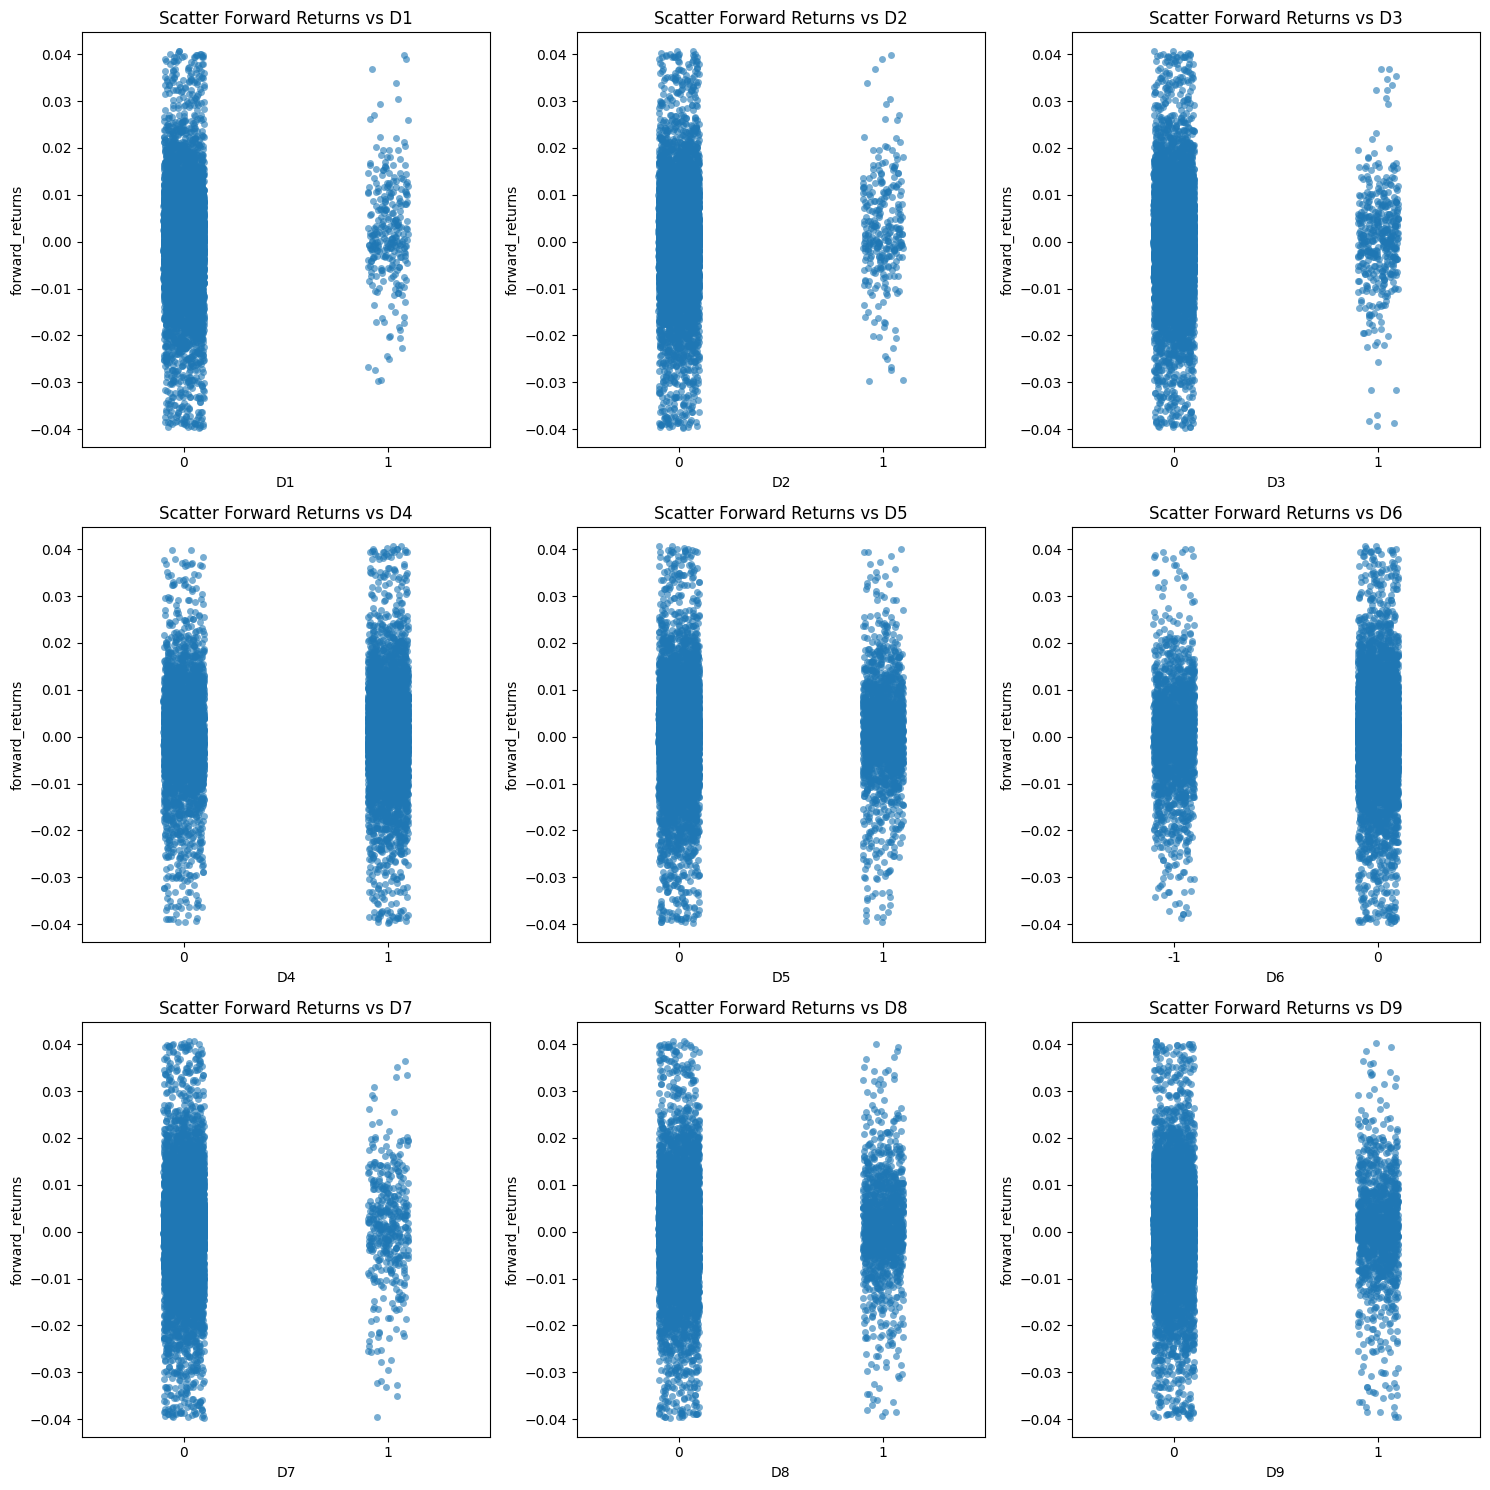

In [45]:
d_cols = [col for col in df.columns if col.startswith('D')]
if d_cols:
    n_plots = len(d_cols)
    ncols = int(np.ceil(np.sqrt(n_plots)))
    nrows = int(np.ceil(n_plots / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 5, nrows * 5))
    axes = axes.flat
    for i, col in enumerate(d_cols):
        sns.stripplot(data=df, x=col, y='forward_returns', jitter=0.1, alpha=0.6, ax=axes[i])
        axes[i].set_title(f'Scatter Forward Returns vs {col}')
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
    plt.tight_layout()
plt.savefig('charts/scatt_fr_vs_d.png')
plt.show()

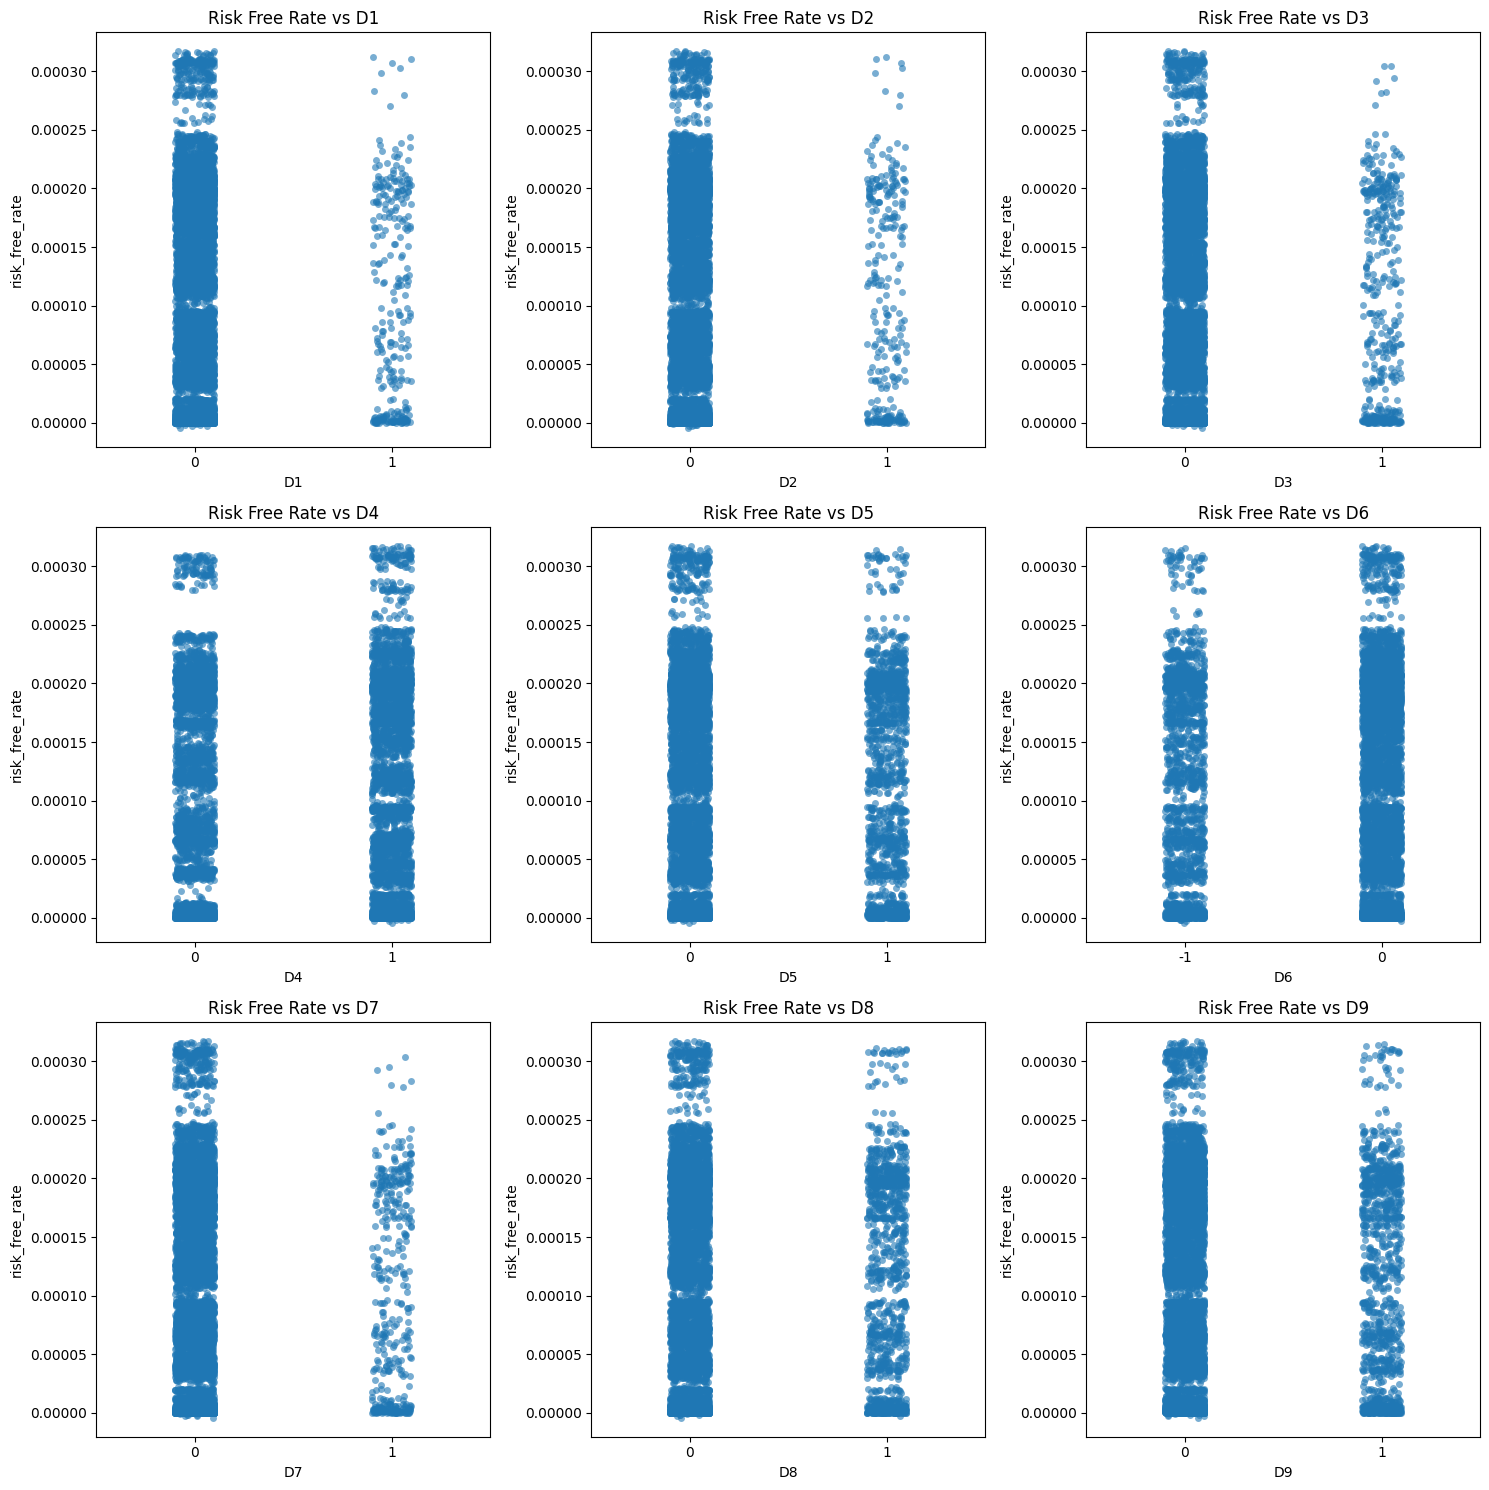

In [46]:
d_cols = [col for col in df.columns if col.startswith('D')]
if d_cols:
    n_plots = len(d_cols)
    ncols = int(np.ceil(np.sqrt(n_plots)))
    nrows = int(np.ceil(n_plots / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 5, nrows * 5))
    axes = axes.flat
    for i, col in enumerate(d_cols):
        sns.stripplot(data=df, x=col, y='risk_free_rate', jitter=0.1, alpha=0.6, ax=axes[i])
        axes[i].set_title(f'Risk Free Rate vs {col}')
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
    plt.tight_layout()
plt.savefig('charts/scatt_rfr_vs_d.png')
plt.show()

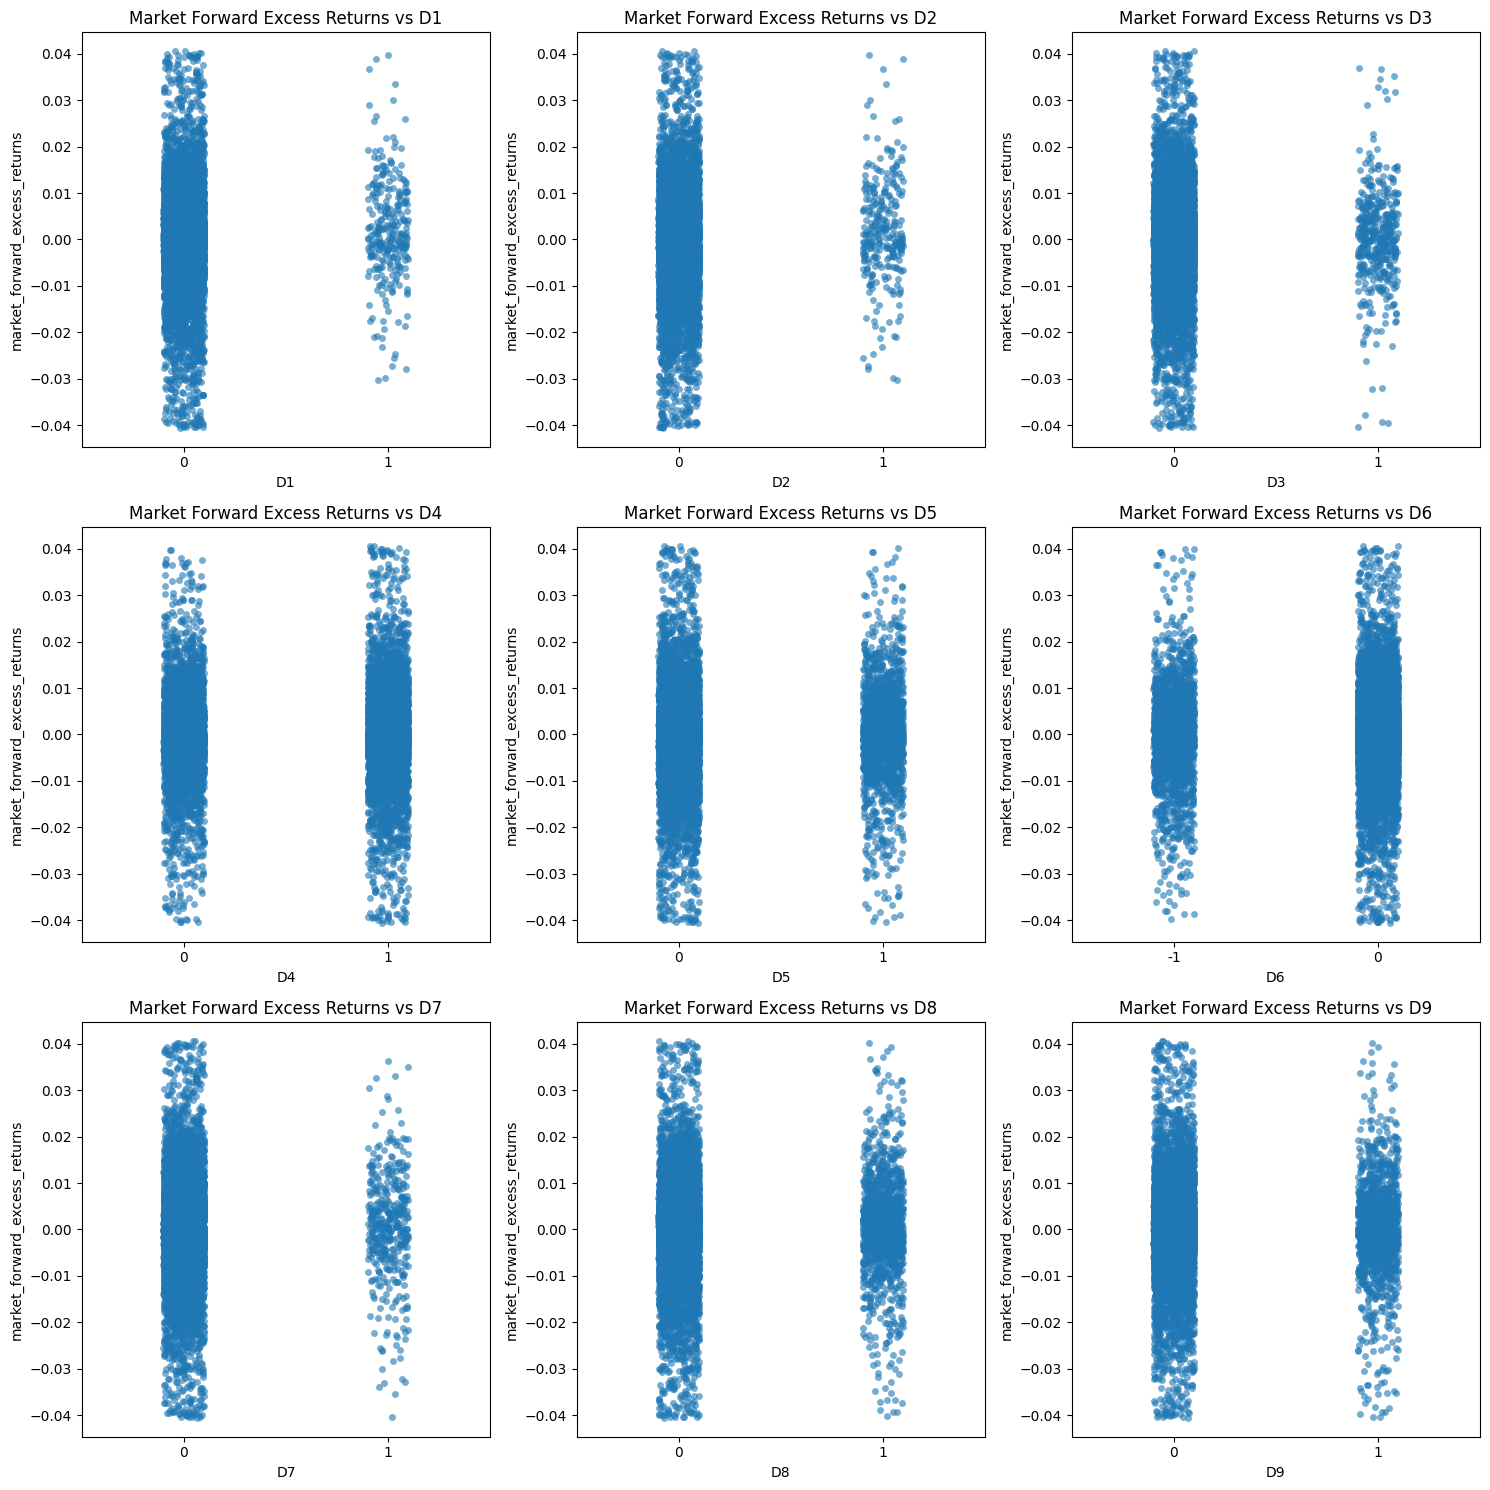

In [47]:
d_cols = [col for col in df.columns if col.startswith('D')]
if d_cols:
    n_plots = len(d_cols)
    ncols = int(np.ceil(np.sqrt(n_plots)))
    nrows = int(np.ceil(n_plots / ncols))
    fig, axes = plt.subplots(nrows, ncols, figsize=(ncols * 5, nrows * 5))
    axes = axes.flat
    for i, col in enumerate(d_cols):
        sns.stripplot(data=df, x=col, y='market_forward_excess_returns', jitter=0.1, alpha=0.6, ax=axes[i])
        axes[i].set_title(f'Market Forward Excess Returns vs {col}')
    # Hide any unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].set_visible(False)
    plt.tight_layout()
plt.savefig('charts/scatt_mfer_vs_d.png')
plt.show()

<h2>Notes</h2>
<ol>
<li><b>D1 through D9</b> have a weak correlation with <b>Forward Returns</b></li>
<li><b>D1 through D9</b> do not have a significant influence on the <b>Risk Free Rate</b></li>
<li><b>D1 through D9</b> do not show a significant response to Market <b>Forward Excess Returns</b></li>
</ol>


## 2. Dynamic Futures Market

In [5]:
df_dynamic = df[['date_id', 'forward_returns', 'risk_free_rate', 'market_forward_excess_returns'] + [col for col in df.columns if col.startswith('M')]].copy()
df_dynamic

date_id  forward_returns  risk_free_rate  market_forward_excess_returns  \
0           0        -0.002421        0.000301                      -0.003038   
1           1        -0.008495        0.000303                      -0.009114   
2           2        -0.009624        0.000301                      -0.010243   
3           3         0.004662        0.000299                       0.004046   
4           4        -0.011686        0.000299                      -0.012301   
...       ...              ...             ...                            ...   
8985     8985         0.002457        0.000155                       0.001990   
8986     8986         0.002312        0.000156                       0.001845   
8987     8987         0.002891        0.000156                       0.002424   
8988     8988         0.008310        0.000156                       0.007843   
8989     8989         0.000099        0.000156                      -0.000368   

            M1       M10       M11       M12       M13       M14  ...  \
0     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  ...   
1     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  ...   
2     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  ...   
3     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  ...   
4     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  ...   
...        ...       ...       ...       ...       ...       ...  ...   
8985 -1.190313 -0.262267 -0.253930  0.189556 -1.200115 -0.755640  ...   
8986 -1.218842 -0.288451 -0.209835  0.138043 -1.193898 -0.754397  ...   
8987 -1.234393 -0.292948 -0.140272  0.166052 -1.208305 -0.754255  ...   
8988 -1.297210 -0.302140 -0.116334  0.167373 -1.214693 -0.753453  ...   
8989 -1.319122 -0.299710 -0.095385  0.195291 -1.211074 -0.752588  ...   

           M17       M18        M2        M3        M4        M5        M6  \
0     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
8985  0.286045  0.317130 -0.632252  1.138825  0.152280  1.359579 -0.187969   
8986  0.284722  0.316799 -0.418564  2.620436  0.097712  0.909058 -0.155919   
8987  0.279762  0.316468  0.501880  0.950040  0.061329  1.428299 -0.277512   
8988  0.282077  0.316138 -0.222224  0.948951 -0.006532  1.518843 -0.171653   
8989  0.283069  0.315807 -1.568658  0.947766  0.555608  1.414547 -0.120000   

            M7        M8        M9  
0     0.000000  0.000000  0.000000  
1     0.000000  0.000000  0.000000  
2     0.000000  0.000000  0.000000  
3     0.000000  0.000000  0.000000  
4     0.000000  0.000000  0.000000  
...        ...       ...       ...  
8985 -0.571545  0.731812  0.331379  
8986 -0.571308  0.772817  0.341697  
8987 -0.571071  0.854167  0.355097  
8988 -0.570834  0.773810  0.370644  
8989 -0.570735  0.335648  0.414964  

[8990 rows x 22 columns]

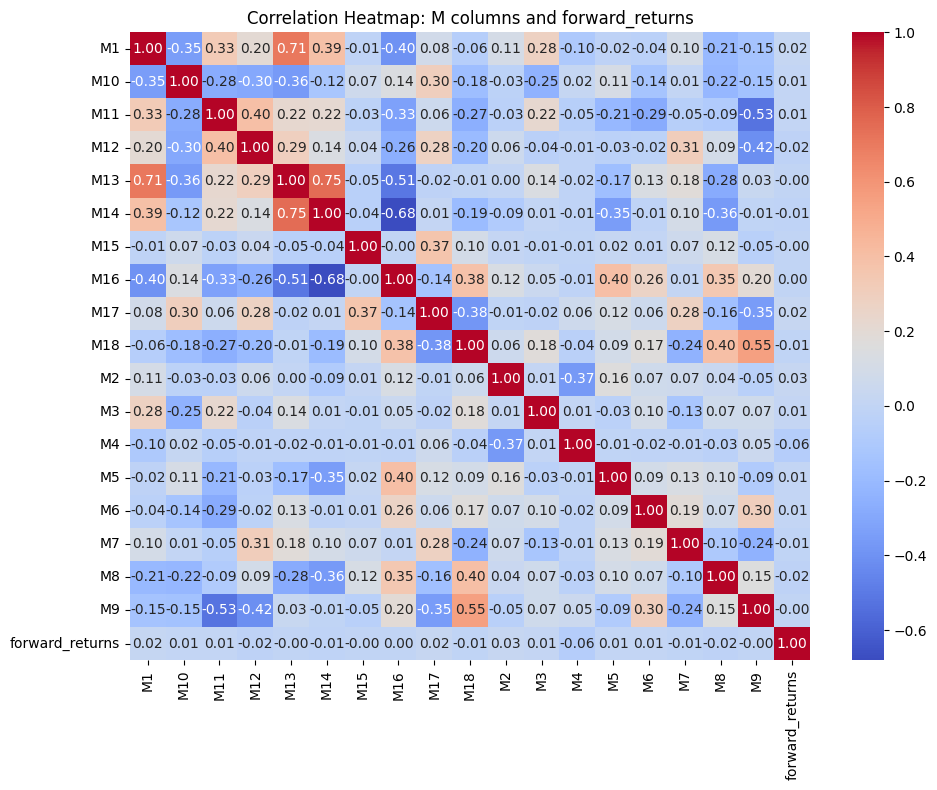

In [ ]:

m_cols = [col for col in df.columns if col.startswith('M')]
n_plots = len(m_cols)
if n_plots == 0:
    print("No columns starting with 'M' found.")
else:
    # Compute correlation matrix
    corr_cols = m_cols + ['forward_returns']
    corr_df = df[corr_cols].corr()

    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.2f', ax=ax)
    ax.set_title('Correlation Heatmap: M columns and forward_returns')

    plt.tight_layout()
    plt.savefig('charts/heatmap_M_forward_returns.png')
    plt.show()

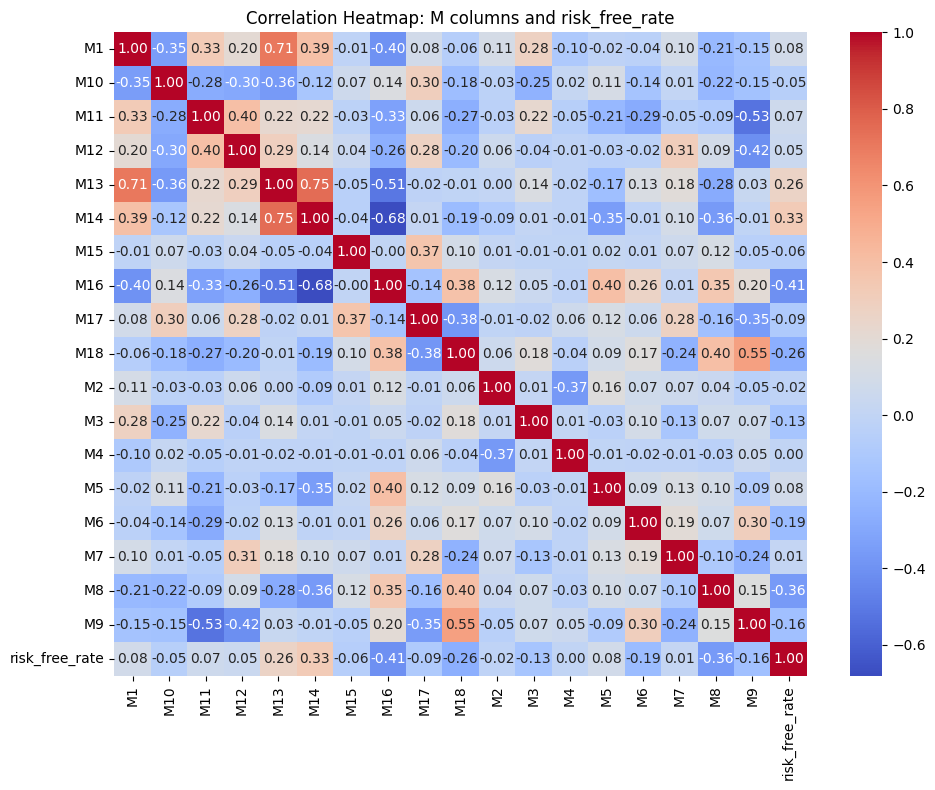

In [12]:

m_cols = [col for col in df.columns if col.startswith('M')]
n_plots = len(m_cols)
if n_plots == 0:
    print("No columns starting with 'M' found.")
else:
    # Compute correlation matrix
    corr_cols = m_cols + ['risk_free_rate']
    corr_df = df[corr_cols].corr()

    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.2f', ax=ax)
    ax.set_title('Correlation Heatmap: M columns and risk_free_rate')

    plt.tight_layout()
    plt.savefig('charts/heatmap_M_risk_free_rate.png')
    plt.show()

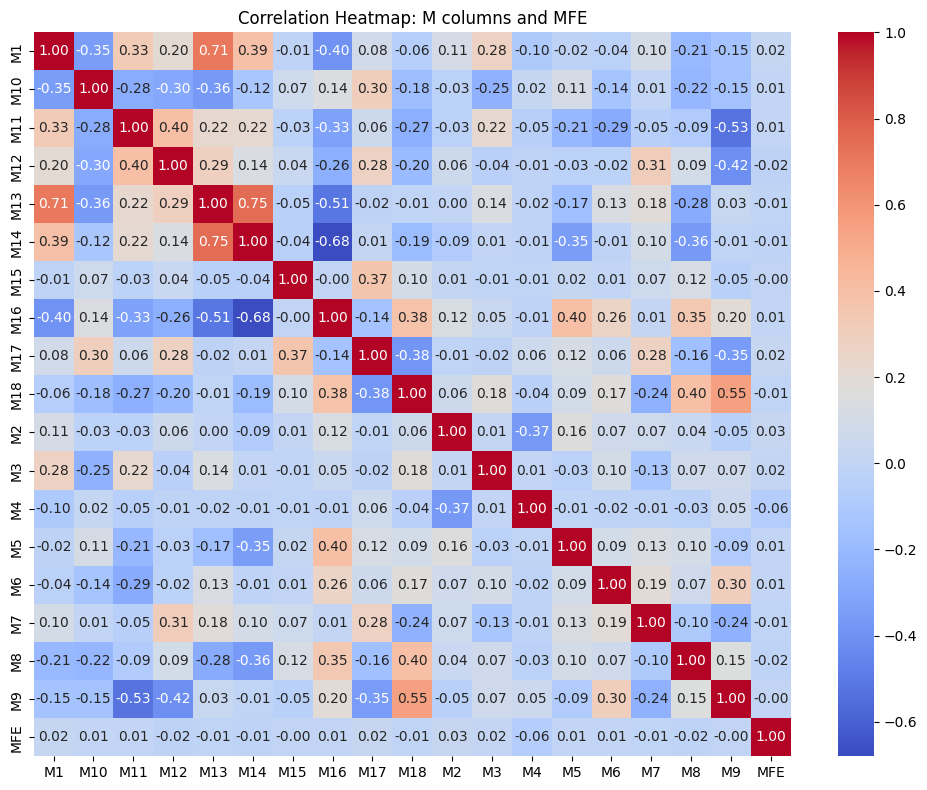

In [17]:

m_cols = [col for col in df.columns if col.startswith('M')]
n_plots = len(m_cols)
if n_plots == 0:
    print("No columns starting with 'M' found.")
else:
    # Compute correlation matrix
    corr_cols = m_cols + ['market_forward_excess_returns']
    df_corr = df[corr_cols].rename(columns={'market_forward_excess_returns': 'MFE'})
    corr_df = df_corr.corr()

    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.2f', ax=ax)
    ax.set_title('Correlation Heatmap: M columns and MFE')

    plt.tight_layout()
    plt.savefig('charts/heatmap_M_market_forward_excess_returns.png')
    plt.show()

<h2>Notes</h2>
<ol>
<li><b>M1 through M18</b> have a weak correlation with <b>Forward Returns</b></li>
<li><b>M1 through M18</b> Has a fairly strong correlation <b>Risk Free Rate</b></li>
<li><b>M1 through M18</b> have a weak correlation with <b>Forward Excess Returns</b></li>
</ol>

## 3. Econonmy Macro Analysis

In [3]:
df_macro = df[['date_id', 'forward_returns', 'risk_free_rate', 'market_forward_excess_returns'] + [col for col in df.columns if col.startswith('E')]].copy()
df_macro

date_id  forward_returns  risk_free_rate  market_forward_excess_returns  \
0           0        -0.002421        0.000301                      -0.003038   
1           1        -0.008495        0.000303                      -0.009114   
2           2        -0.009624        0.000301                      -0.010243   
3           3         0.004662        0.000299                       0.004046   
4           4        -0.011686        0.000299                      -0.012301   
...       ...              ...             ...                            ...   
8985     8985         0.002457        0.000155                       0.001990   
8986     8986         0.002312        0.000156                       0.001845   
8987     8987         0.002891        0.000156                       0.002424   
8988     8988         0.008310        0.000156                       0.007843   
8989     8989         0.000099        0.000156                      -0.000368   

            E1       E10       E11       E12       E13       E14  ...  \
0     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  ...   
1     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  ...   
2     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  ...   
3     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  ...   
4     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  ...   
...        ...       ...       ...       ...       ...       ...  ...   
8985  1.565379  0.184524  0.019180  0.019180  0.005952  0.005952  ...   
8986  1.562946  0.184193  0.018849  0.018849  0.005622  0.005622  ...   
8987  1.560520  0.183862  0.018519  0.018519  0.005291  0.005291  ...   
8988  1.558102  0.183532  0.018188  0.018188  0.004960  0.004960  ...   
8989  1.555690  0.183201  0.017857  0.017857  0.004630  0.004630  ...   

           E19        E2       E20        E3        E4        E5        E6  \
0     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
8985 -0.122314  1.209250  1.540116  1.655174  0.031415  0.331680  0.034722   
8986 -0.732397  1.225459  1.537761  1.672262  0.031085  0.331349  0.034392   
8987 -0.800465  1.247273  1.534742  1.695469  0.030754  0.331019  0.034061   
8988 -0.596939  1.271926  1.532340  1.721692  0.030423  0.330688  0.033730   
8989 -0.747066  1.312626  1.529875  1.765317  0.030093  0.330357  0.033399   

            E7        E8        E9  
0     0.000000  0.000000  0.000000  
1     0.000000  0.000000  0.000000  
2     0.000000  0.000000  0.000000  
3     0.000000  0.000000  0.000000  
4     0.000000  0.000000  0.000000  
...        ...       ...       ...  
8985  0.038269 -0.301876  0.914683  
8986  0.038205 -0.301897  0.915013  
8987  0.038118 -0.301918  0.915344  
8988  0.037647 -0.301939  0.915675  
8989  0.037561 -0.267677  0.916005  

[8990 rows x 24 columns]

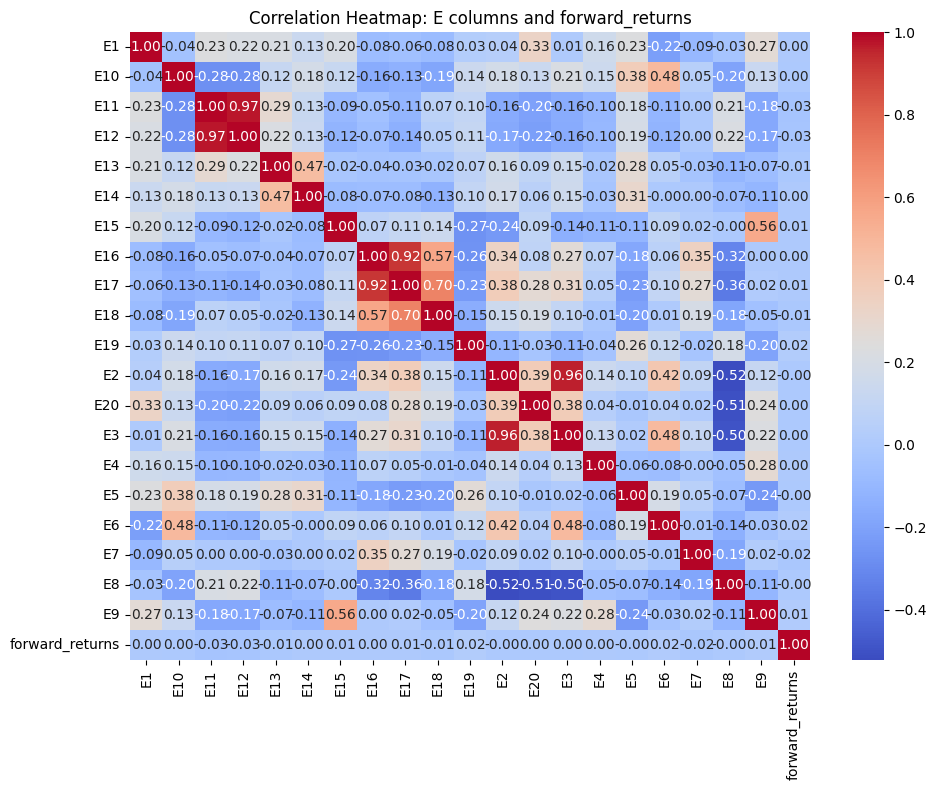

In [4]:

m_cols = [col for col in df.columns if col.startswith('E')]
n_plots = len(m_cols)
if n_plots == 0:
    print("No columns starting with 'E' found.")
else:
    # Compute correlation matrix
    corr_cols = m_cols + ['forward_returns']
    corr_df = df[corr_cols].corr()

    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.2f', ax=ax)
    ax.set_title('Correlation Heatmap: E columns and forward_returns')

    plt.tight_layout()
    plt.savefig('charts/heatmap_E_forward_returns.png')
    plt.show()

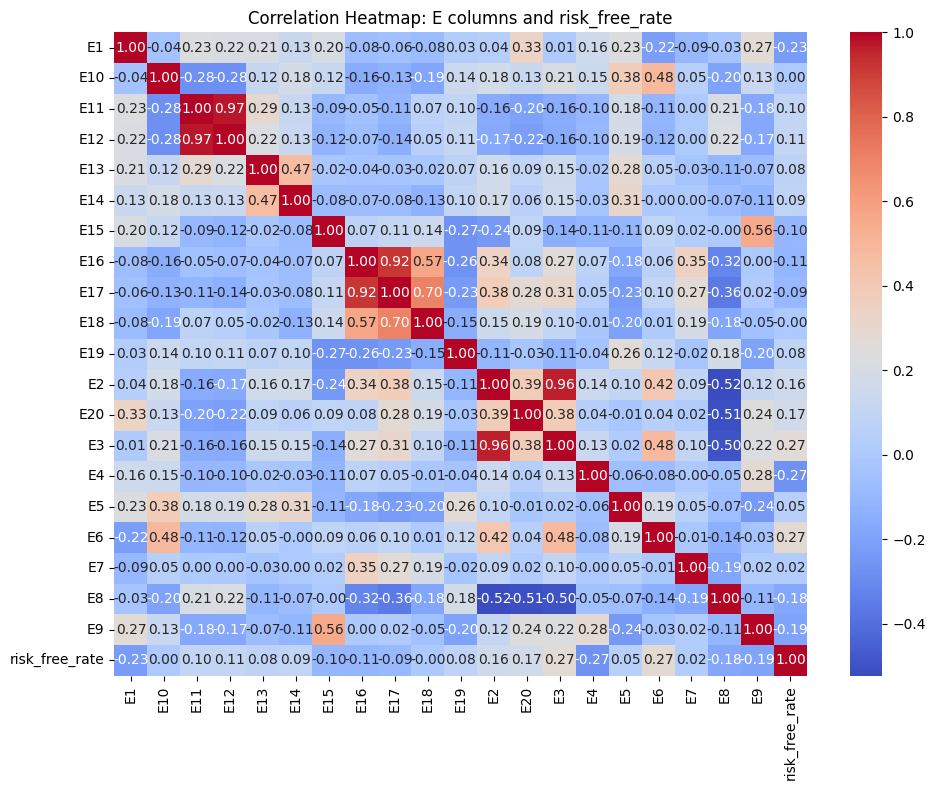

In [5]:

m_cols = [col for col in df.columns if col.startswith('E')]
n_plots = len(m_cols)
if n_plots == 0:
    print("No columns starting with 'E' found.")
else:
    # Compute correlation matrix
    corr_cols = m_cols + ['risk_free_rate']
    corr_df = df[corr_cols].corr()

    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.2f', ax=ax)
    ax.set_title('Correlation Heatmap: E columns and risk_free_rate')

    plt.tight_layout()
    plt.savefig('charts/heatmap_E_risk_free_rate.png')
    plt.show()

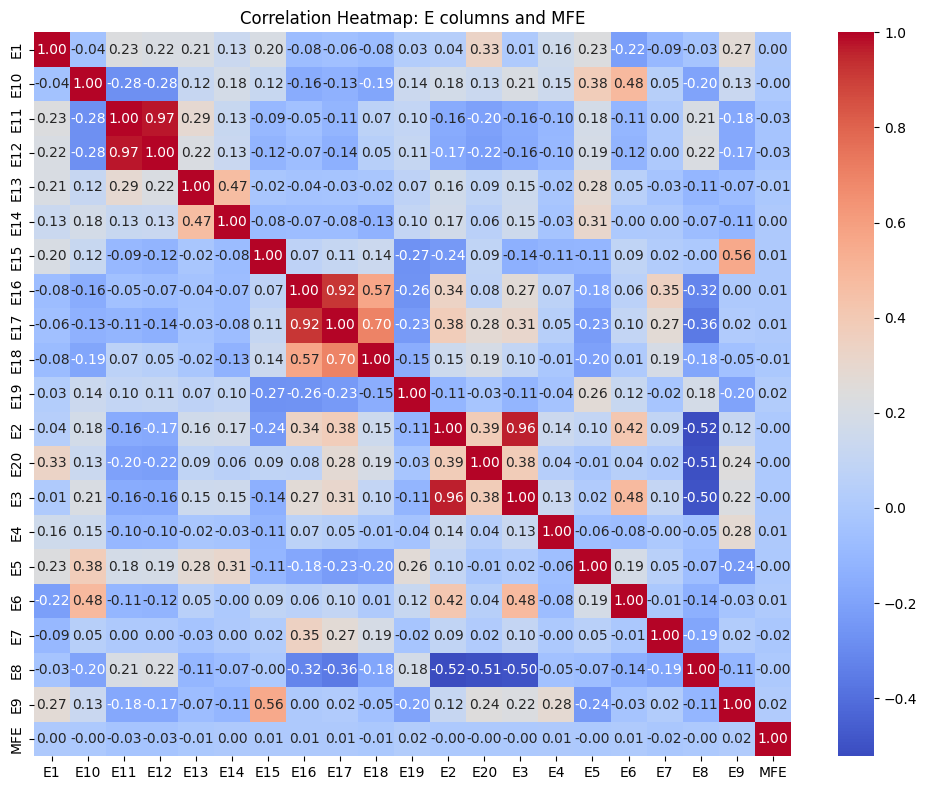

In [6]:
m_cols = [col for col in df.columns if col.startswith('E')]
n_plots = len(m_cols)
if n_plots == 0:
    print("No columns starting with 'E' found.")
else:
    # Compute correlation matrix
    corr_cols = m_cols + ['market_forward_excess_returns']
    df_corr = df[corr_cols].rename(columns={'market_forward_excess_returns': 'MFE'})
    corr_df = df_corr.corr()

    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.2f', ax=ax)
    ax.set_title('Correlation Heatmap: E columns and MFE')

    plt.tight_layout()
    plt.savefig('charts/heatmap_E_market_forward_excess_returns.png')
    plt.show()

<h2>Notes</h2>
<ol>
<li><b>E1 through E20</b> have a weak correlation with <b>Forward Returns</b></li>
<li><b>E1 through E20</b> Has a <i>fairly strong correlation</i> <b>Risk Free Rate</b></li>
<li><b>E1 through E20</b> have a weak correlation with <b>Forward Excess Returns</b></li>
</ol>

## 4. Interest Rates

In [7]:
df_interest = df[['date_id', 'forward_returns', 'risk_free_rate', 'market_forward_excess_returns'] + [col for col in df.columns if col.startswith('E')]].copy()
df_interest

date_id  forward_returns  risk_free_rate  market_forward_excess_returns  \
0           0        -0.002421        0.000301                      -0.003038   
1           1        -0.008495        0.000303                      -0.009114   
2           2        -0.009624        0.000301                      -0.010243   
3           3         0.004662        0.000299                       0.004046   
4           4        -0.011686        0.000299                      -0.012301   
...       ...              ...             ...                            ...   
8985     8985         0.002457        0.000155                       0.001990   
8986     8986         0.002312        0.000156                       0.001845   
8987     8987         0.002891        0.000156                       0.002424   
8988     8988         0.008310        0.000156                       0.007843   
8989     8989         0.000099        0.000156                      -0.000368   

            E1       E10       E11       E12       E13       E14  ...  \
0     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  ...   
1     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  ...   
2     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  ...   
3     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  ...   
4     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  ...   
...        ...       ...       ...       ...       ...       ...  ...   
8985  1.565379  0.184524  0.019180  0.019180  0.005952  0.005952  ...   
8986  1.562946  0.184193  0.018849  0.018849  0.005622  0.005622  ...   
8987  1.560520  0.183862  0.018519  0.018519  0.005291  0.005291  ...   
8988  1.558102  0.183532  0.018188  0.018188  0.004960  0.004960  ...   
8989  1.555690  0.183201  0.017857  0.017857  0.004630  0.004630  ...   

           E19        E2       E20        E3        E4        E5        E6  \
0     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
8985 -0.122314  1.209250  1.540116  1.655174  0.031415  0.331680  0.034722   
8986 -0.732397  1.225459  1.537761  1.672262  0.031085  0.331349  0.034392   
8987 -0.800465  1.247273  1.534742  1.695469  0.030754  0.331019  0.034061   
8988 -0.596939  1.271926  1.532340  1.721692  0.030423  0.330688  0.033730   
8989 -0.747066  1.312626  1.529875  1.765317  0.030093  0.330357  0.033399   

            E7        E8        E9  
0     0.000000  0.000000  0.000000  
1     0.000000  0.000000  0.000000  
2     0.000000  0.000000  0.000000  
3     0.000000  0.000000  0.000000  
4     0.000000  0.000000  0.000000  
...        ...       ...       ...  
8985  0.038269 -0.301876  0.914683  
8986  0.038205 -0.301897  0.915013  
8987  0.038118 -0.301918  0.915344  
8988  0.037647 -0.301939  0.915675  
8989  0.037561 -0.267677  0.916005  

[8990 rows x 24 columns]

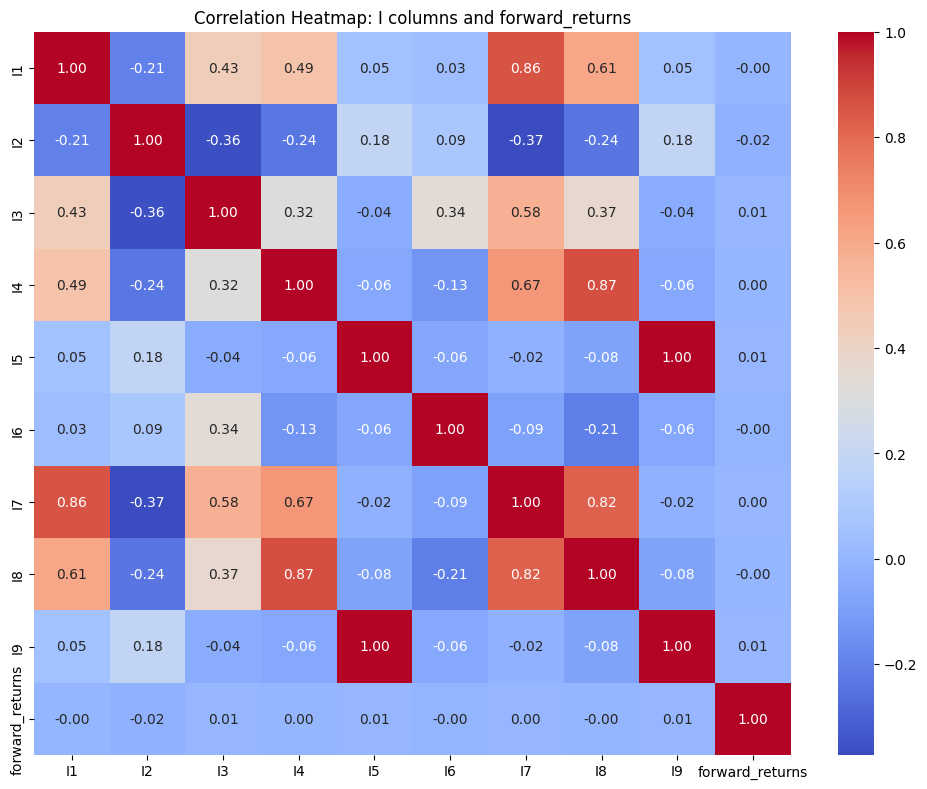

In [8]:

m_cols = [col for col in df.columns if col.startswith('I')]
n_plots = len(m_cols)
if n_plots == 0:
    print("No columns starting with 'I' found.")
else:
    # Compute correlation matrix
    corr_cols = m_cols + ['forward_returns']
    corr_df = df[corr_cols].corr()

    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.2f', ax=ax)
    ax.set_title('Correlation Heatmap: I columns and forward_returns')

    plt.tight_layout()
    plt.savefig('charts/heatmap_I_forward_returns.png')
    plt.show()

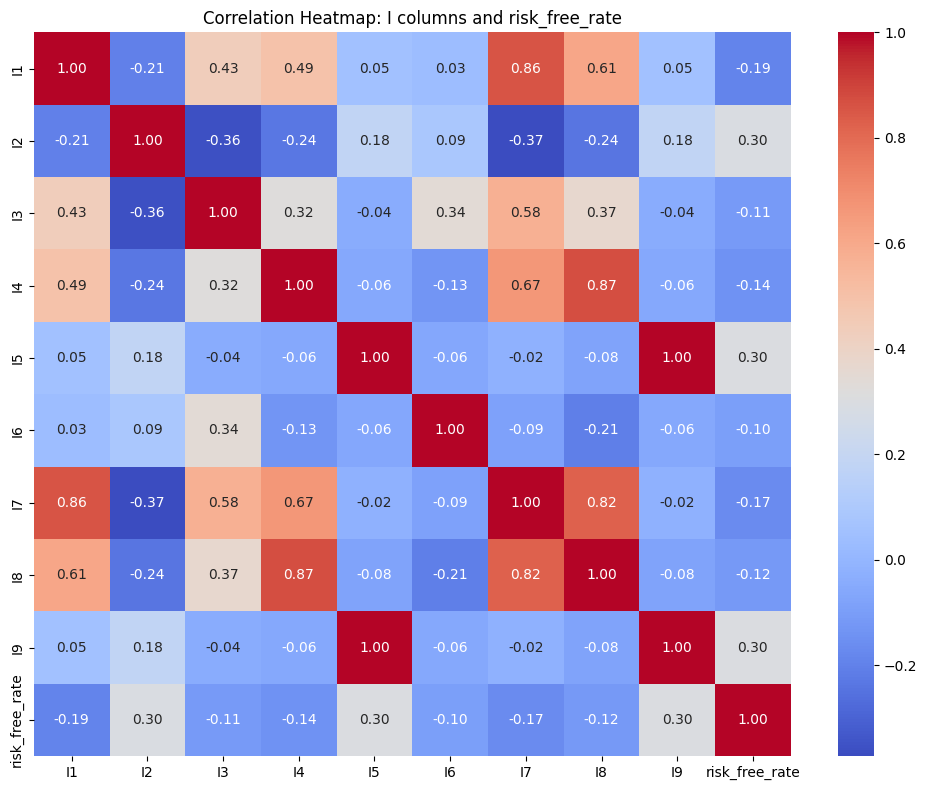

In [9]:
m_cols = [col for col in df.columns if col.startswith('I')]
n_plots = len(m_cols)
if n_plots == 0:
    print("No columns starting with 'I' found.")
else:
    # Compute correlation matrix
    corr_cols = m_cols + ['risk_free_rate']
    corr_df = df[corr_cols].corr()

    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.2f', ax=ax)
    ax.set_title('Correlation Heatmap: I columns and risk_free_rate')

    plt.tight_layout()
    plt.savefig('charts/heatmap_I_risk_free_rate.png')
    plt.show()

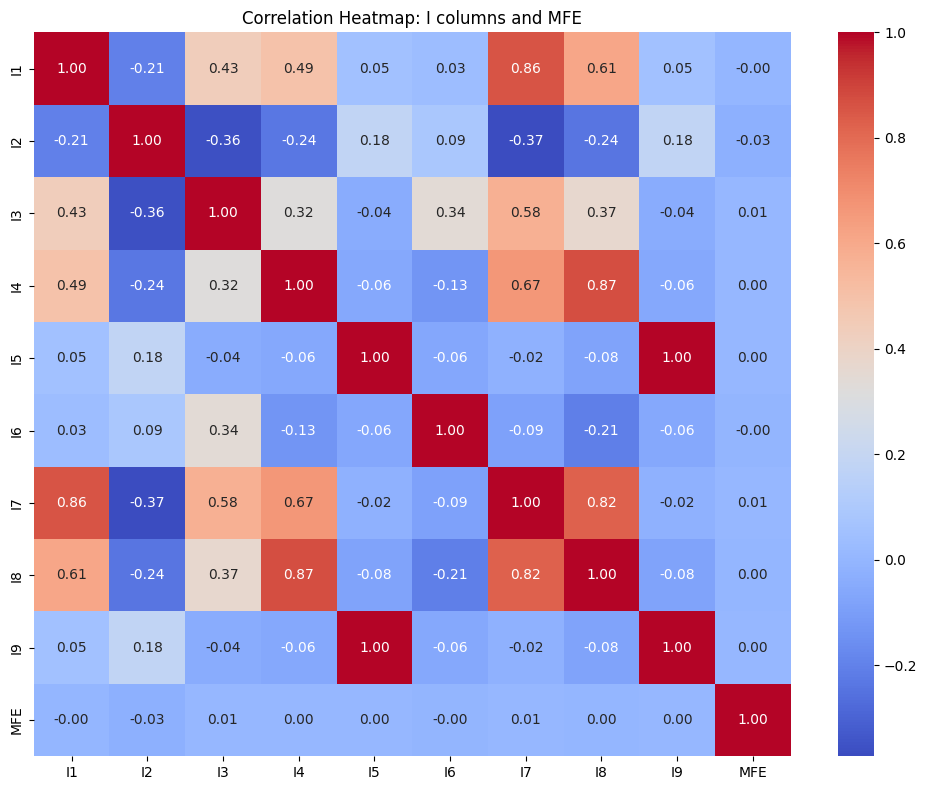

In [10]:
m_cols = [col for col in df.columns if col.startswith('I')]
n_plots = len(m_cols)
if n_plots == 0:
    print("No columns starting with 'I' found.")
else:
    # Compute correlation matrix
    corr_cols = m_cols + ['market_forward_excess_returns']
    df_corr = df[corr_cols].rename(columns={'market_forward_excess_returns': 'MFE'})
    corr_df = df_corr.corr()

    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.2f', ax=ax)
    ax.set_title('Correlation Heatmap: I columns and MFE')

    plt.tight_layout()
    plt.savefig('charts/heatmap_I_market_forward_excess_returns.png')
    plt.show()

<h2>Notes</h2>
<ol>
<li><b>I1 through I9</b> have a weak correlation with <b>Forward Returns</b></li>
<li><b>I1 through I9</b> Has a <i>fairly strong correlation</i> <b>Risk Free Rate</b></li>
<li><b>I1 through I9</b> have a weak correlation with <b>Forward Excess Returns</b></li>
</ol>

## 5. Price Analysis

In [11]:
df_interest = df[['date_id', 'forward_returns', 'risk_free_rate', 'market_forward_excess_returns'] + [col for col in df.columns if col.startswith('P')]].copy()
df_interest

date_id  forward_returns  risk_free_rate  market_forward_excess_returns  \
0           0        -0.002421        0.000301                      -0.003038   
1           1        -0.008495        0.000303                      -0.009114   
2           2        -0.009624        0.000301                      -0.010243   
3           3         0.004662        0.000299                       0.004046   
4           4        -0.011686        0.000299                      -0.012301   
...       ...              ...             ...                            ...   
8985     8985         0.002457        0.000155                       0.001990   
8986     8986         0.002312        0.000156                       0.001845   
8987     8987         0.002891        0.000156                       0.002424   
8988     8988         0.008310        0.000156                       0.007843   
8989     8989         0.000099        0.000156                      -0.000368   

            P1       P10       P11       P12       P13        P2        P3  \
0     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
8985  0.394180  2.087888  2.212791  0.648069  0.625331 -1.354498  0.046296   
8986  0.383598  2.092041  2.225902  0.916799  0.739418 -1.384785  0.232143   
8987  0.304894  2.092283  2.235097 -0.702456  0.809193 -1.420007  0.849868   
8988  0.354828  2.094798  2.247297  1.456942  0.923611 -1.431028  0.303241   
8989  0.458995  2.112168  2.307912  0.376967  0.886243 -1.469985  0.553571   

            P4        P5        P6        P7        P8        P9  
0     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
1     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
2     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
3     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
4     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
...        ...       ...       ...       ...       ...       ...  
8985  0.514550  0.276769 -0.261326  0.811754  1.784929  0.039683  
8986  0.379299  1.199260 -0.344274  0.690323  1.791596  0.037037  
8987  0.375661  0.429471 -0.233374 -0.289766  1.792816  0.041005  
8988  0.068783  0.044888 -0.269862  0.423268  1.792934  0.046958  
8989  0.244378  0.306917 -0.177546  1.885541  1.796492  0.047619  

[8990 rows x 17 columns]

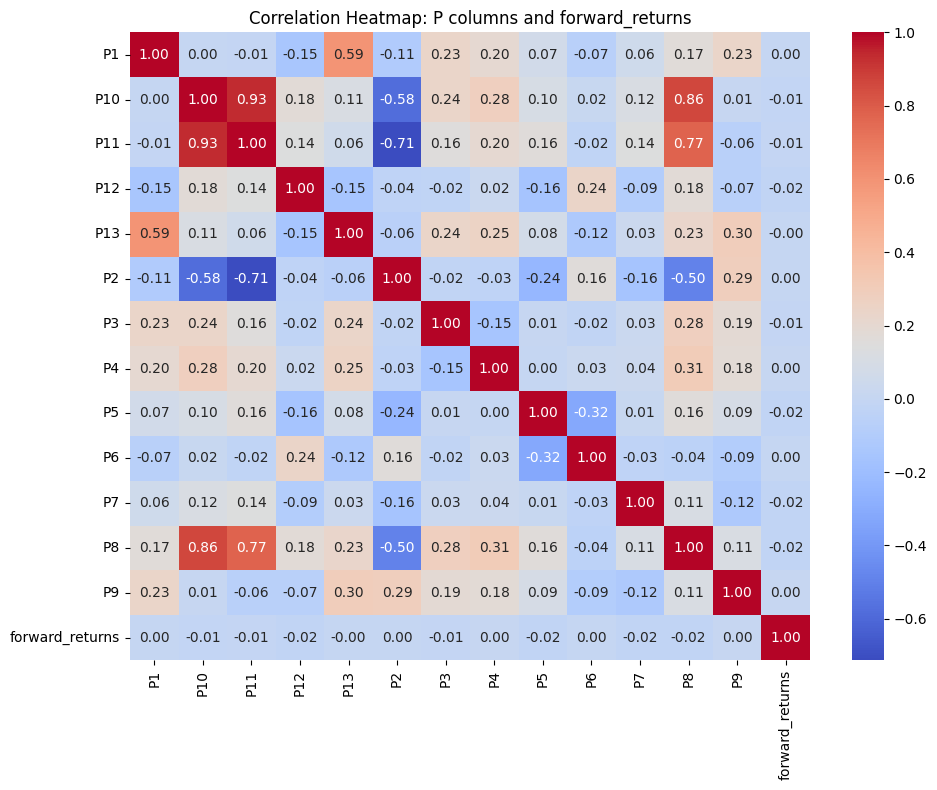

In [13]:

m_cols = [col for col in df.columns if col.startswith('P')]
n_plots = len(m_cols)
if n_plots == 0:
    print("No columns starting with 'P' found.")
else:
    # Compute correlation matrix
    corr_cols = m_cols + ['forward_returns']
    corr_df = df[corr_cols].corr()

    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.2f', ax=ax)
    ax.set_title('Correlation Heatmap: P columns and forward_returns')

    plt.tight_layout()
    plt.savefig('charts/heatmap_P_forward_returns.png')
    plt.show()

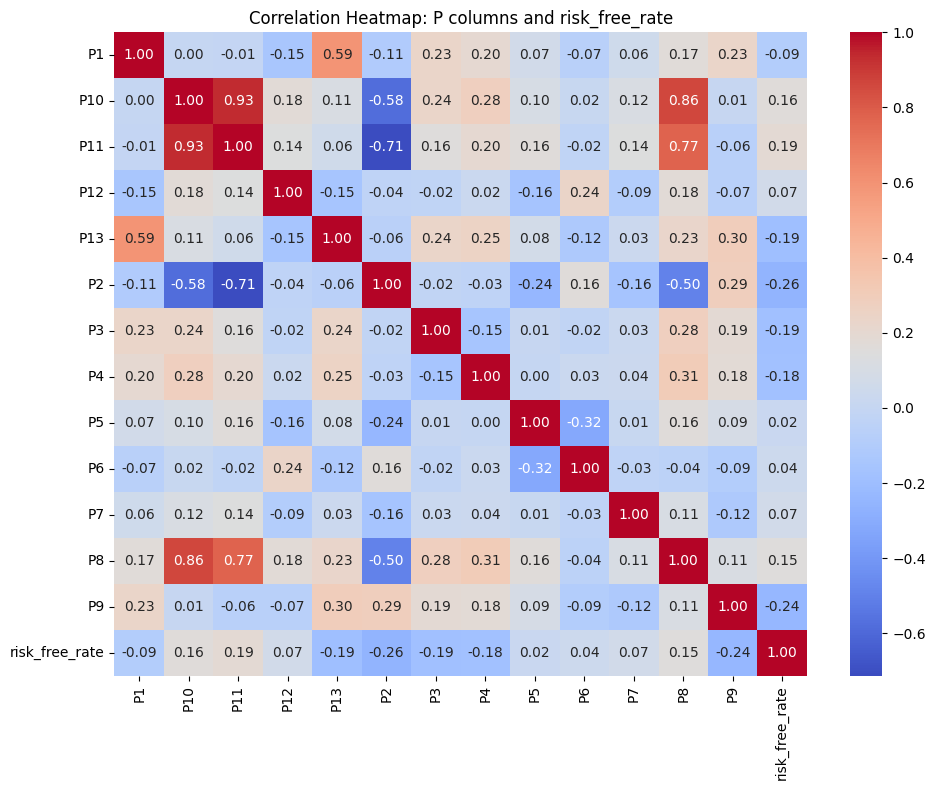

In [14]:

m_cols = [col for col in df.columns if col.startswith('P')]
n_plots = len(m_cols)
if n_plots == 0:
    print("No columns starting with 'P' found.")
else:
    # Compute correlation matrix
    corr_cols = m_cols + ['risk_free_rate']
    corr_df = df[corr_cols].corr()

    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.2f', ax=ax)
    ax.set_title('Correlation Heatmap: P columns and risk_free_rate')

    plt.tight_layout()
    plt.savefig('charts/heatmap_P_risk_free_rate.png')
    plt.show()

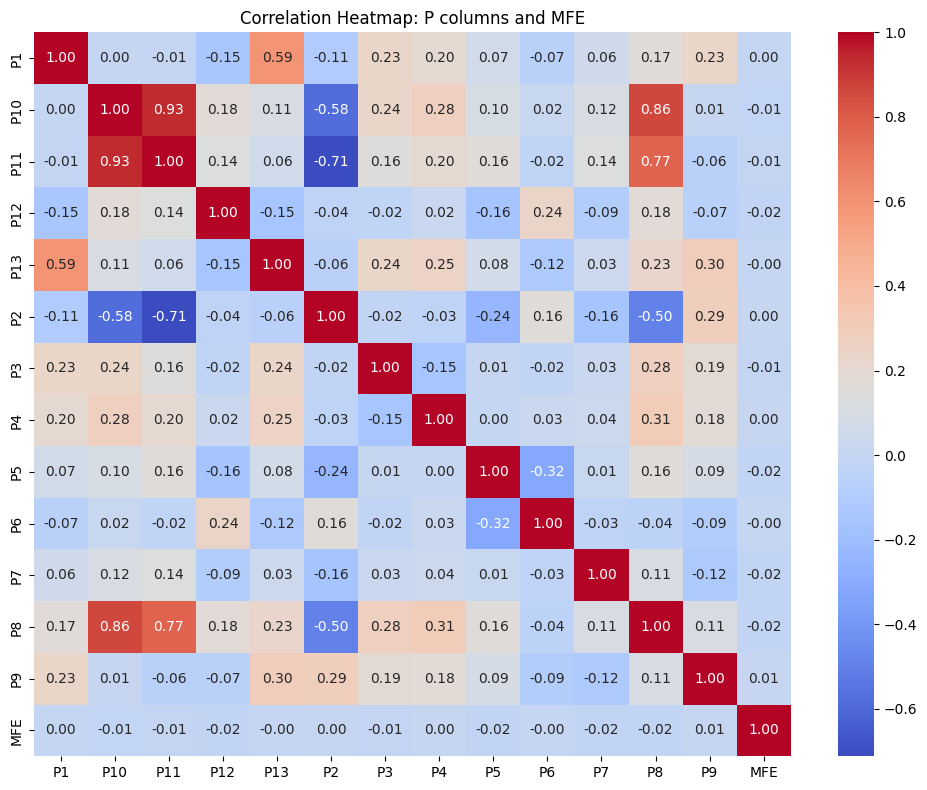

In [15]:
m_cols = [col for col in df.columns if col.startswith('P')]
n_plots = len(m_cols)
if n_plots == 0:
    print("No columns starting with 'P' found.")
else:
    # Compute correlation matrix
    corr_cols = m_cols + ['market_forward_excess_returns']
    df_corr = df[corr_cols].rename(columns={'market_forward_excess_returns': 'MFE'})
    corr_df = df_corr.corr()

    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.2f', ax=ax)
    ax.set_title('Correlation Heatmap: P columns and MFE')

    plt.tight_layout()
    plt.savefig('charts/heatmap_P_market_forward_excess_returns.png')
    plt.show()

<h2>Notes</h2>
<ol>
<li><b>P1 through P9</b> have a weak correlation with <b>Forward Returns</b></li>
<li><b>P1 through P9</b> Has a <i>fairly strong correlation</i> <b>Risk Free Rate</b></li>
<li><b>P1 through P9</b> have a weak correlation with <b>Forward Excess Returns</b></li>
</ol>

## 6. Volatility Analysis

In [3]:
df_vol = df[['date_id', 'forward_returns', 'risk_free_rate', 'market_forward_excess_returns'] + [col for col in df.columns if col.startswith('V')]].copy()
df_vol

date_id  forward_returns  risk_free_rate  market_forward_excess_returns  \
0           0        -0.002421        0.000301                      -0.003038   
1           1        -0.008495        0.000303                      -0.009114   
2           2        -0.009624        0.000301                      -0.010243   
3           3         0.004662        0.000299                       0.004046   
4           4        -0.011686        0.000299                      -0.012301   
...       ...              ...             ...                            ...   
8985     8985         0.002457        0.000155                       0.001990   
8986     8986         0.002312        0.000156                       0.001845   
8987     8987         0.002891        0.000156                       0.002424   
8988     8988         0.008310        0.000156                       0.007843   
8989     8989         0.000099        0.000156                      -0.000368   

            V1       V10       V11       V12       V13        V2        V3  \
0     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
8985  0.498677 -0.616395  0.561839  0.533730 -0.432282  0.785053  0.469577   
8986  0.528439 -0.642040  0.587632  0.526455 -0.429506  0.767857  0.671958   
8987  0.599206 -0.638658  0.394841  0.433532 -0.425462  0.734127  0.481481   
8988  0.462302 -0.626927  0.326389  0.394180 -0.385170  0.695106  0.655423   
8989  0.318783 -0.668050  0.129630  0.370040 -0.451308  0.663360  0.066799   

            V4        V5        V6        V7        V8        V9  
0     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
1     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
2     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
3     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
4     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
...        ...       ...       ...       ...       ...       ...  
8985  0.837963  1.226772  0.822751 -0.707361  0.142857 -0.649616  
8986  0.837963  0.785877  0.805556 -0.715692  0.196098 -0.668289  
8987  0.787698  0.834898  0.823413 -0.723949  0.133929 -0.670946  
8988  0.783730  0.994026  0.851852 -0.684937  0.101852 -0.646265  
8989  0.783730  1.068037  0.879630 -0.764806  0.079034 -0.705662  

[8990 rows x 17 columns]

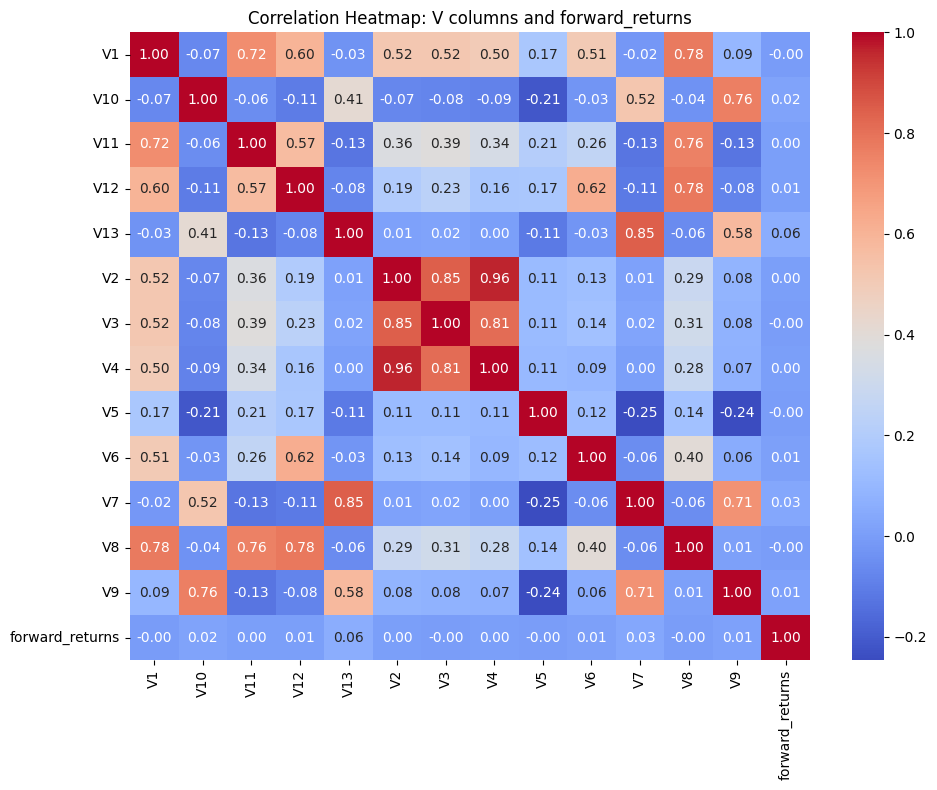

In [4]:

m_cols = [col for col in df.columns if col.startswith('V')]
n_plots = len(m_cols)
if n_plots == 0:
    print("No columns starting with 'V' found.")
else:
    # Compute correlation matrix
    corr_cols = m_cols + ['forward_returns']
    corr_df = df[corr_cols].corr()

    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.2f', ax=ax)
    ax.set_title('Correlation Heatmap: V columns and forward_returns')

    plt.tight_layout()
    plt.savefig('charts/heatmap_V_forward_returns.png')
    plt.show()

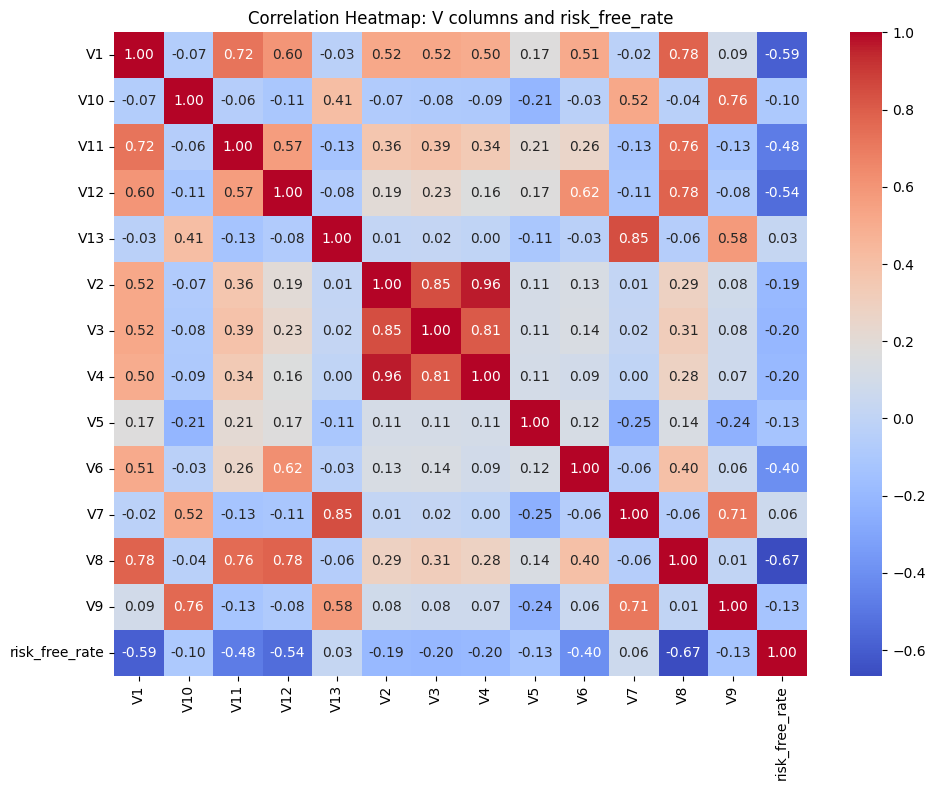

In [5]:

m_cols = [col for col in df.columns if col.startswith('V')]
n_plots = len(m_cols)
if n_plots == 0:
    print("No columns starting with 'V' found.")
else:
    # Compute correlation matrix
    corr_cols = m_cols + ['risk_free_rate']
    corr_df = df[corr_cols].corr()

    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.2f', ax=ax)
    ax.set_title('Correlation Heatmap: V columns and risk_free_rate')

    plt.tight_layout()
    plt.savefig('charts/heatmap_V_risk_free_rate.png')
    plt.show()

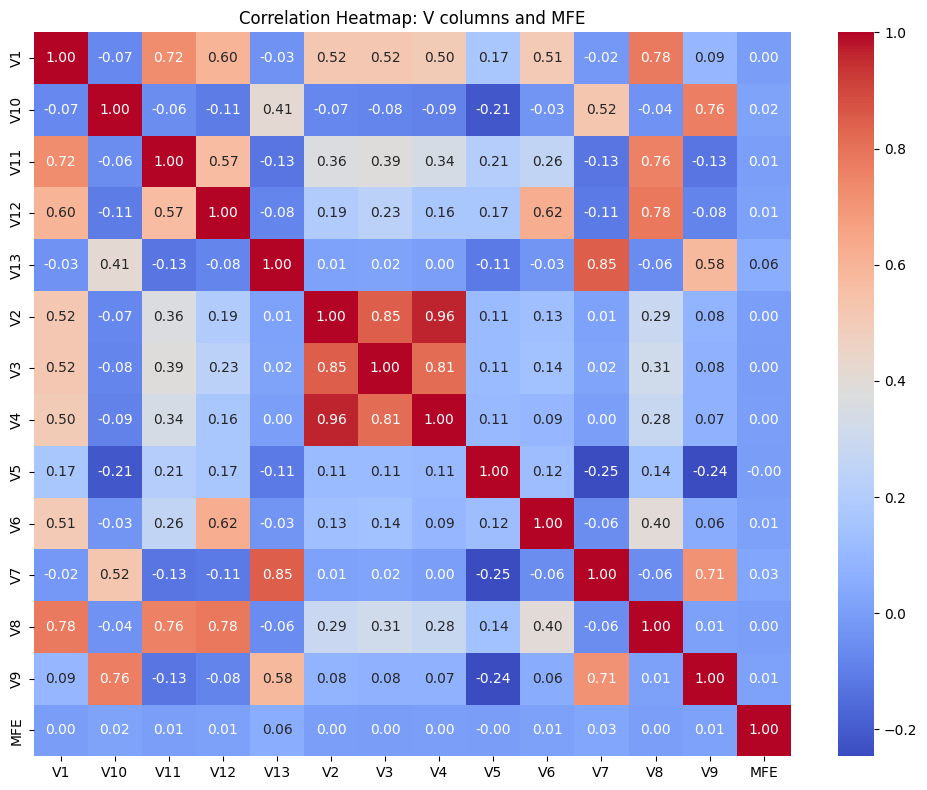

In [6]:
m_cols = [col for col in df.columns if col.startswith('V')]
n_plots = len(m_cols)
if n_plots == 0:
    print("No columns starting with 'V' found.")
else:
    # Compute correlation matrix
    corr_cols = m_cols + ['market_forward_excess_returns']
    df_corr = df[corr_cols].rename(columns={'market_forward_excess_returns': 'MFE'})
    corr_df = df_corr.corr()

    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.2f', ax=ax)
    ax.set_title('Correlation Heatmap: V columns and MFE')

    plt.tight_layout()
    plt.savefig('charts/heatmap_V_market_forward_excess_returns.png')
    plt.show()

<h2>Notes</h2>
<ol>
<li><b>V1 through V13</b> have a weak correlation with <b>Forward Returns</b></li>
<li><b>V1 through V13</b> Has a <i>fairly strong correlation</i> <b>Risk Free Rate</b></li>
<li><b>V1 through V13</b> have a weak correlation with <b>Forward Excess Returns</b></li>
</ol>

## 7. Sentiment Analysis

In [7]:
df_senti = df[['date_id', 'forward_returns', 'risk_free_rate', 'market_forward_excess_returns'] + [col for col in df.columns if col.startswith('S')]].copy()
df_senti

date_id  forward_returns  risk_free_rate  market_forward_excess_returns  \
0           0        -0.002421        0.000301                      -0.003038   
1           1        -0.008495        0.000303                      -0.009114   
2           2        -0.009624        0.000301                      -0.010243   
3           3         0.004662        0.000299                       0.004046   
4           4        -0.011686        0.000299                      -0.012301   
...       ...              ...             ...                            ...   
8985     8985         0.002457        0.000155                       0.001990   
8986     8986         0.002312        0.000156                       0.001845   
8987     8987         0.002891        0.000156                       0.002424   
8988     8988         0.008310        0.000156                       0.007843   
8989     8989         0.000099        0.000156                      -0.000368   

            S1       S10       S11       S12        S2        S3        S4  \
0     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
8985  0.249933  0.273148  0.134921  0.634465 -0.446682 -0.052686  0.083995   
8986  0.298533  0.933201  0.721561  1.211345 -0.118050 -0.249315  0.566799   
8987  0.371362  0.793651  0.689815  0.885178 -0.316882 -0.422374  0.631614   
8988  0.411610  0.011905  0.026455 -0.001785 -0.317961 -0.608348  0.066138   
8989  0.410794  0.351852  0.070767  0.257443  0.011109 -0.642480  0.170635   

            S5        S6        S7        S8        S9  
0     0.000000  0.000000  0.000000  0.000000  0.000000  
1     0.000000  0.000000  0.000000  0.000000  0.000000  
2     0.000000  0.000000  0.000000  0.000000  0.000000  
3     0.000000  0.000000  0.000000  0.000000  0.000000  
4     0.000000  0.000000  0.000000  0.000000  0.000000  
...        ...       ...       ...       ...       ...  
8985  0.055282  0.209656  0.409392  0.574661  0.748677  
8986  0.107330  0.228175  0.409392  0.580932  0.370370  
8987 -0.029770  0.221892  0.409392  0.583556  0.477513  
8988 -0.001594  0.259921  0.409392  0.630090  0.915344  
8989 -0.105022  0.354167  0.409392  0.629295  0.771825  

[8990 rows x 16 columns]

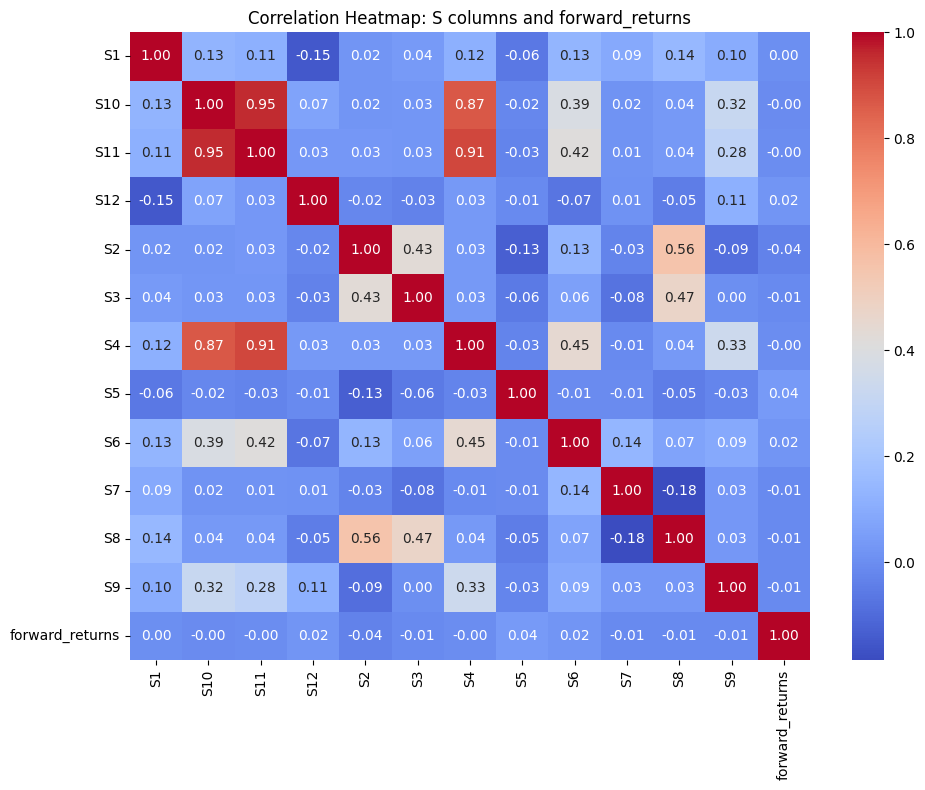

In [8]:

m_cols = [col for col in df.columns if col.startswith('S')]
n_plots = len(m_cols)
if n_plots == 0:
    print("No columns starting with 'S' found.")
else:
    # Compute correlation matrix
    corr_cols = m_cols + ['forward_returns']
    corr_df = df[corr_cols].corr()

    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.2f', ax=ax)
    ax.set_title('Correlation Heatmap: S columns and forward_returns')

    plt.tight_layout()
    plt.savefig('charts/heatmap_S_forward_returns.png')
    plt.show()

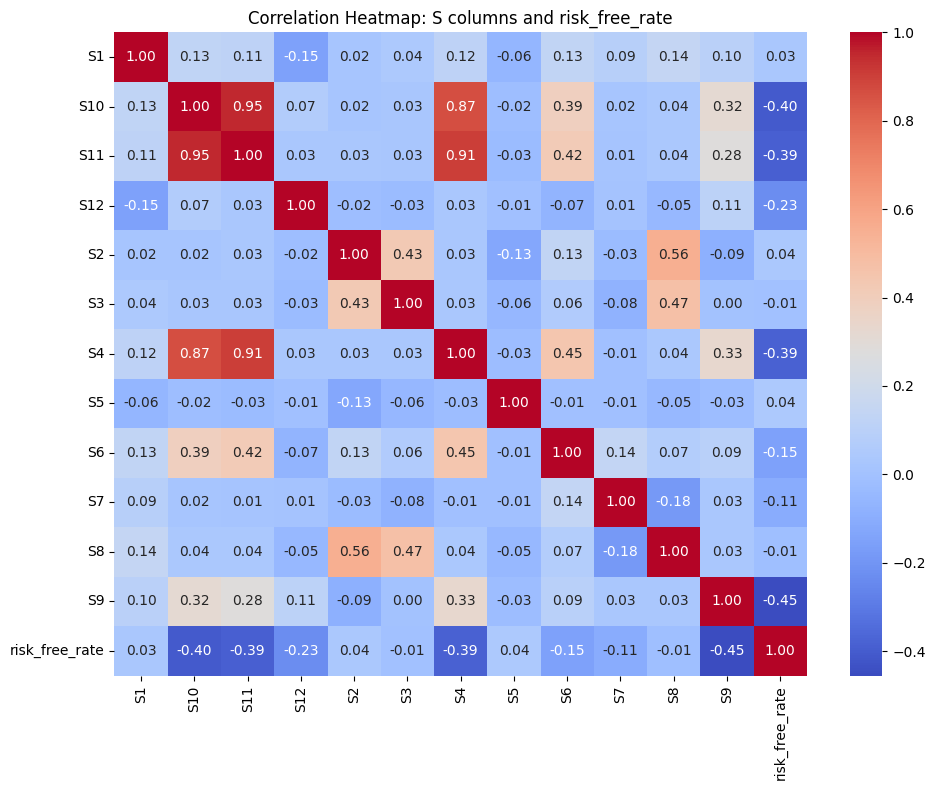

In [9]:

m_cols = [col for col in df.columns if col.startswith('S')]
n_plots = len(m_cols)
if n_plots == 0:
    print("No columns starting with 'S' found.")
else:
    # Compute correlation matrix
    corr_cols = m_cols + ['risk_free_rate']
    corr_df = df[corr_cols].corr()

    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.2f', ax=ax)
    ax.set_title('Correlation Heatmap: S columns and risk_free_rate')

    plt.tight_layout()
    plt.savefig('charts/heatmap_S_risk_free_rate.png')
    plt.show()

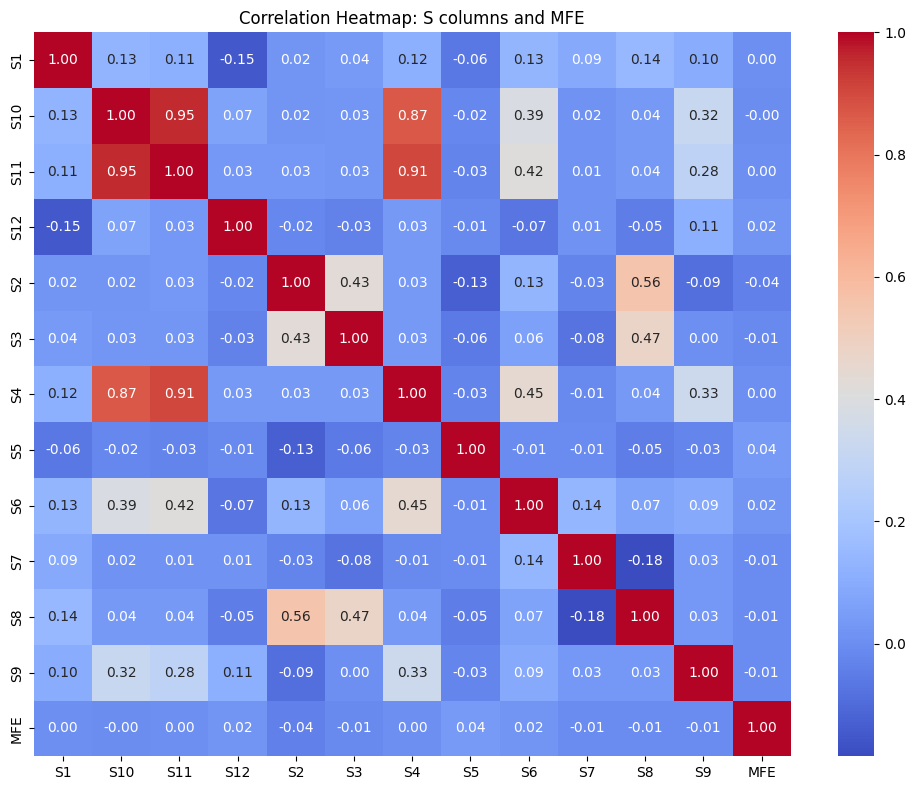

In [10]:
m_cols = [col for col in df.columns if col.startswith('S')]
n_plots = len(m_cols)
if n_plots == 0:
    print("No columns starting with 'S' found.")
else:
    # Compute correlation matrix
    corr_cols = m_cols + ['market_forward_excess_returns']
    df_corr = df[corr_cols].rename(columns={'market_forward_excess_returns': 'MFE'})
    corr_df = df_corr.corr()

    fig, ax = plt.subplots(figsize=(10, 8))
    sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.2f', ax=ax)
    ax.set_title('Correlation Heatmap: S columns and MFE')

    plt.tight_layout()
    plt.savefig('charts/heatmap_S_market_forward_excess_returns.png')
    plt.show()

<h2>Notes</h2>
<ol>
<li><b>S1 through S10</b> have a weak correlation with <b>Forward Returns</b></li>
<li><b>S1 through S10</b> Has a <i>fairly strong correlation</i> <b>Risk Free Rate</b></li>
<li><b>S1 through S10</b> have a weak correlation with <b>Forward Excess Returns</b></li>
</ol>

## 8. Target Analysis

In [12]:
df_target = df[['date_id', 'forward_returns', 'risk_free_rate', 'market_forward_excess_returns']].copy()
df_target

date_id  forward_returns  risk_free_rate  market_forward_excess_returns
0           0        -0.002421        0.000301                      -0.003038
1           1        -0.008495        0.000303                      -0.009114
2           2        -0.009624        0.000301                      -0.010243
3           3         0.004662        0.000299                       0.004046
4           4        -0.011686        0.000299                      -0.012301
...       ...              ...             ...                            ...
8985     8985         0.002457        0.000155                       0.001990
8986     8986         0.002312        0.000156                       0.001845
8987     8987         0.002891        0.000156                       0.002424
8988     8988         0.008310        0.000156                       0.007843
8989     8989         0.000099        0.000156                      -0.000368

[8990 rows x 4 columns]

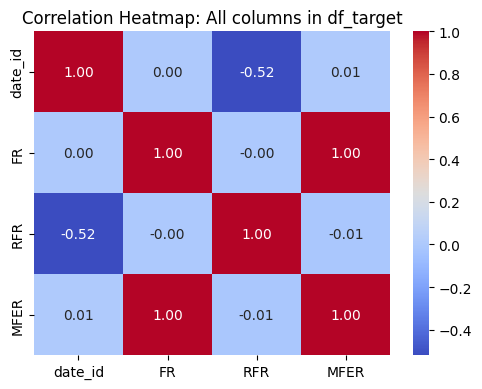

In [15]:
m_cols = list(df_target.columns)
n_plots = len(m_cols)
if n_plots == 0:
    print("No columns found in df_target.")
else:
    # Compute correlation matrix
    corr_df = df_target.corr()

    # Rename specific columns for display
    rename_dict = {
        'forward_returns': 'FR',
        'risk_free_rate': 'RFR',
        'market_forward_excess_returns': 'MFER'
    }
    corr_df = corr_df.rename(index=rename_dict, columns=rename_dict)

    fig, ax = plt.subplots(figsize=(5, 4))
    sns.heatmap(corr_df, annot=True, cmap='coolwarm', fmt='.2f', ax=ax)
    ax.set_title('Correlation Heatmap: All columns in df_target')

    plt.tight_layout()
    plt.savefig('charts/heatmap_all_df_target.png')
    plt.show()

# 3. Further EDA